In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [2]:
font_dir = ['C:/python/fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths = font_dir):
    mpl.font_manager.fontManager.addfont(font)

In [3]:
# Set font family globally
mpl.rcParams['font.family'] = 'maruburi'
print(mpl.rcParams['font.family'])

['maruburi']


In [4]:
mpl.rc('axes', unicode_minus = False)

In [5]:
%matplotlib inline

# Seaborn이란?

In [6]:
# Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한
# 시각화 패키지

# 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels
# 패키지에 의존

# 테마를 활용해서 스타일 적용하기 

In [7]:
# set_theme()는 global 범위의 테마를 적용해서 그래프를 쉽게 꾸밀 수 있다. 
# style과 palette 키워드 인수를 활용해서 그 값을 설정

# - style: darkgrid, whitegrid, dark, white, ticks, ...
# - palette: pastel, husl, Spectral, flare, ...

sns.set_theme(style = 'whitegrid')

# ※(참고) set_context()의 인수로 paper, notebook, talk, poster 중 하나를 넣으면
# 해당하는 설정을 세팅할 수 있다.

# 카운트 플롯 countplot()

In [8]:
# countplot()을 사용하면 각 카테고리 값마다의 데이터가 얼마나 있는지 표시할 수 있다.
# 카운트 플롯은 카테고리별 히스토그램이라고 볼 수 있다. 
# API와 옵션은 바 차트와 동일

# seaborn.countplot(data = None, *, x = None, y = None, hue = None, order = None,
#                   hue_order = None, orient = None, color = None, palette = None,
#                   saturation = 0.75, width = 0.8, dodge = True, ax = None, **kwargs)

<AxesSubplot:xlabel='class', ylabel='count'>

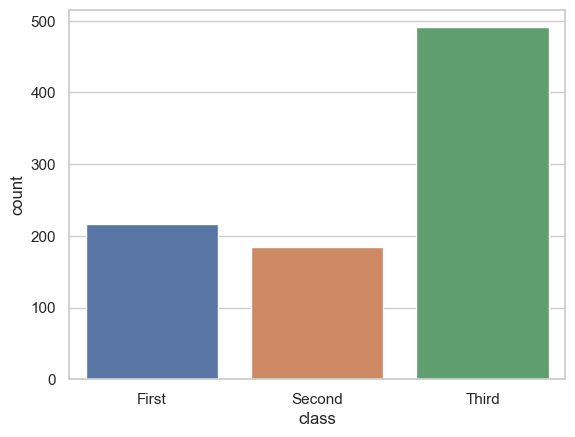

In [9]:
# 타이타닉 데이터셋을 활용해서 카운트 플롯 확인
# class는 선실 등급을 나타내는 column
# value_counts()의 결과를 보는듯한 바 차트를 볼 수 있다.
# 각 유니크한 값들이 몇개씩 있는지 시각적 확인이 가능

# Show the number of datapoints with each value of a categorical variable
df = sns.load_dataset("titanic")
sns.countplot(x = df['class'])
# x 키워드 인수에 Series를 전달

<AxesSubplot:xlabel='class', ylabel='count'>

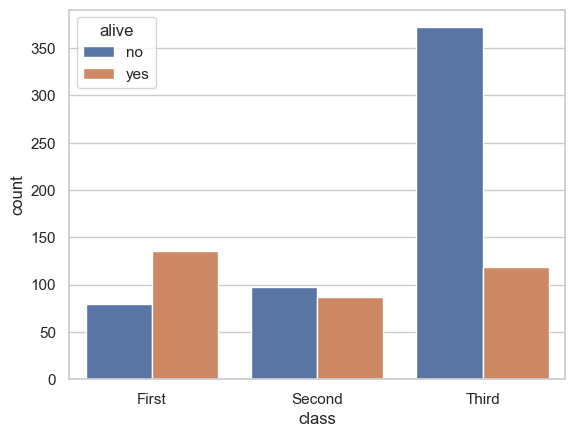

In [10]:
# hue 키워드 인수를 활용하여 분류할 두 번째 변수를 설정할 수 있다. 
# 여기서는 alive를 column을 지정하였고 선실별 생존 여부를 가시적으로 
# 확인할 수 있게 돕고 있다.

# Group by a second variable
sns.countplot(data = df, x = 'class', hue = 'alive')
# data 키워드 인수에 DataFrame을 전달 
# x 키워드 인수에 DataFrame 중 매칭하고 싶은 column의 name 값을 전달
# hue 키워드 인수에 DataFrame 중 매칭하고 싶은 column의 name 값을 전달

In [11]:
# 플롯을 수평하게도 작성할 수 있다. 
# y 키워드 인수에 data로 넘긴 DataFrame의 column name 값을 전달하면 된다. 
# 아래 예제에서는 그래프를 수평하게 표현하여 카테고리 레이블을 나타내는 
# legend(범례) 공간을 확보했습니다.

# Plot horizontally to make more space for category labels
sns.countplot(data = df, y = 'deck', hue = 'alive')

<AxesSubplot:xlabel='count', ylabel='deck'>

# 러그플롯 rugplot()

In [12]:
# tips 데이터셋

# 각 column마다의 의미는 다음과 같다.

# - total_bill: 총 지불 금액($)
# - tip: 팁($)
# - sex: 성별
# - smoker: 흡연 여부
# - day: 요일
# - time: 식사 시간대
# - size: 식사 인원

tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

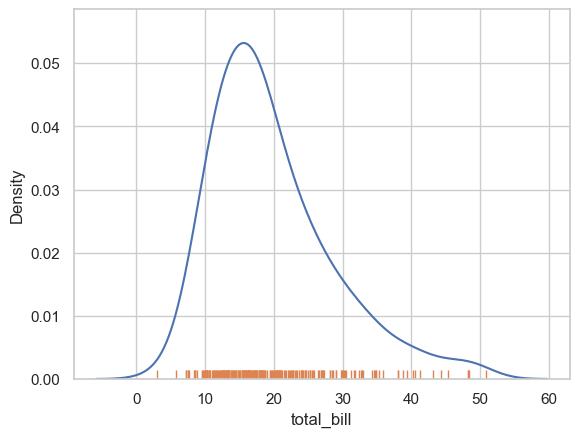

In [13]:
# 러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 
# 실제 데이터들의 위치를 보여준다.

# 커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다
# 부드러운 형태의 분포 곡선을 보여주는 방법이다.

sns.kdeplot(data = tips, x = 'total_bill') # 커널 밀도 그래프
sns.rugplot(data = tips, x = 'total_bill') # 하단의 작은 선분들

In [14]:
# 아래 예제에서는 scatterplot()과 동시에 사용
# 이 때 x, y 축 모두 값이 할당되고 있는데, 이에 따라 rugplot()에서도 동일하게 축을 세팅
# marginal rug plot이 x, y축 모두 표햔됨

# Add a rug along both axes
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')
sns.rugplot(data = tips, x = 'total_bill', y = 'tip') 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

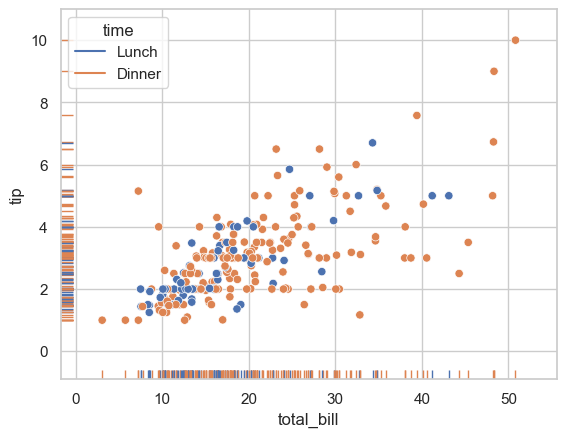

In [15]:
# rugplot()의 키워드 인수로 hue를 설정하고 있다. 
# rug plot의 모습을 보면 색상이 둘로 나뉘어 표시되는 것을 확인할 수 있다. 
# 하나 더 분류 값을 추가하여 더 입체적인 그래프 결과를 도출해내고 있다.

# Represent a third variable with hue mapping
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'time')
sns.rugplot(data = tips, x = 'total_bill', y = 'tip', hue = 'time')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

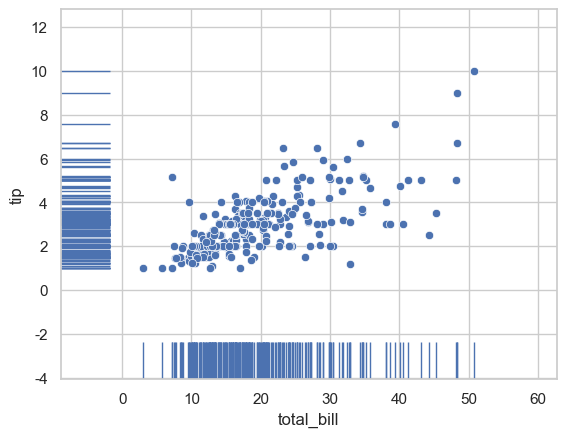

In [16]:
# rug plot의 크기를 조절할 수 있는데 height 키워드 인수를 통해 전체 그래프 크기 대비
# 얼마의 비율로 차지할지 ratio를 적으면 된다. 

# 아래 예제에서는 0.1 값을 설정하고 있는데, 이는 전체 그래프 크기의 10%를 차지하게 됩니다.

# Draw a taller rug
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')
sns.rugplot(data = tips, x = 'total_bill', y = 'tip', height = .1)

<AxesSubplot:xlabel='carat', ylabel='price'>

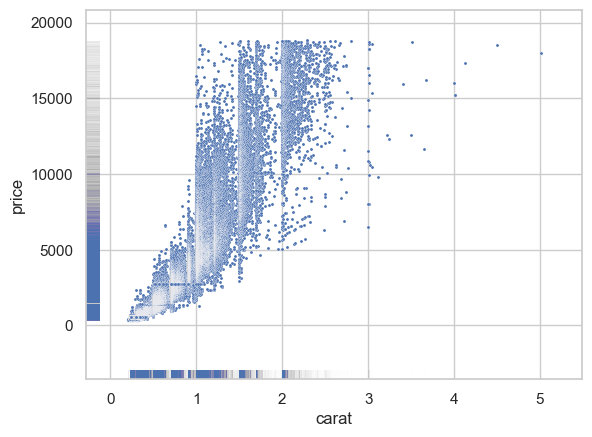

In [17]:
# 데이터가 상당히 많을 때 rug plot이 정확히 표현되지 않을 수 있다. 
# 이를 좀 더 명확히 하기 위해서 alpha 키워드 인수를 통해 투명도를 설정하고 있다. 
# 1에 가까울수록 불투명하고 0에 가까울 수록 투명하다. 
# 또 lw(line width) 값을 1로 지정해서 더 촘촘하게 표현하고 있다.

# Show the density of a larger dataset using thinner lines and alpha blending
diamonds = sns.load_dataset('diamonds')
sns.scatterplot(data = diamonds, x = 'carat', y = 'price', s = 5) 
# s 키워드 인수는 점을 찍는모양 및 크기를 지정하는 것
sns.rugplot(data = diamonds, x = 'carat', y = 'price', lw = 1, alpha = .005)
# 많이 겹칠수록 rug의 색깔이 진해짐

# 히스토그램  histplot()

In [18]:
# hisplot()은 1차원 혹은 2차원 데이터의분포를 히스토그램으로 보여준다.

# seaborn.histplot(data = None, *, x = None, y = None, hue = None, weight = None,
#                 stat = 'count', bins = 'auto', binwidth = None, binrange = None,
#                 discrete = None, cumulative = False, common_bins = True,
#                 common_norm = True, multiple = 'layer', elements = 'bars',
#                 fill = True, shrink = 1, kde = False, kde_kws = None,
#                 line_kws = None, thresh = 0, pthresh = None, pmax = None,
#                 cbar = False, cbar_ax = None, cbar_kws = None, palette = None,
#                 hue_order = None, hue_norm = None, color = None, log_scale = None,
#                 legend = True, ax = None, **kwargs)

In [19]:
# penguins dataset

penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [20]:
penguins.info()
# - species: 펭귄의 종(Chinstrap, Adélie, Gentoo)
# - culmen_length_mm: culmen length(mm)
# - culmen_depth_mm: culmen depth(mm)
# - flipper_length_mm: flipper length(mm)
# - body_mass_g: 체중(g)
# - island: 서식지 섬 (Dream, Torgersen, or Biscoe) 
#           in the Palmer Archipelago(Antarctica)
# - sex: 펭귄 성별

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [21]:
# # 이미지 삽입하는 패키지
# !pip install IPython 

In [22]:
from IPython.display import Image

# 이미지 호출
Image("C:/python/datas/body_part_of_penguin.png")

## histplot() x축 기준

In [23]:
# flipper 길이에 대한 분포를 x축 기준으로 히스토그램을 나타내는 예제
# data로 DataFrame을 전달하고 x 키워드 인수로 columns label 값을 전달
# 히스토그램을 보면 좌측 y축은 개수를 표현하고 있습니다.

# Assign a variable to x to plot a univariate distribution along the x axis
sns.histplot(data = penguins, x = 'flipper_length_mm')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

## histplot() y축 기준

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

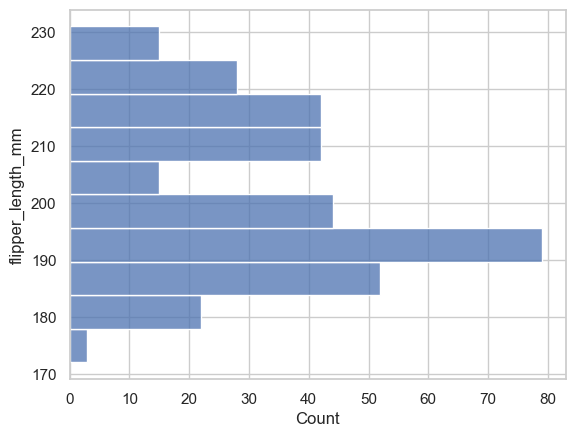

In [24]:
# y축을 기준으로 히스토그램을 표현 
# x 키워드 인수를 y 키워드 인수로 변경하여 표현

# Flip the plot by assigning the data variable to the y axis
sns.histplot(data = penguins, y = 'flipper_length_mm')

## histplot() bin 너비 지정하기

In [25]:
# binwidth 키워드 인수를 사용하면 bin의 너비를 지정할 수 있다. 
# 현재는 3으로 값을 줘서 3의 범위만큼 히스토그램이 표현되는 것을 확인할 수 있다.

# Check how well the histogram represents the data by specifying a different bin width
sns.histplot(data = penguins, x = 'flipper_length_mm', binwidth = 3)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

## histplot() bin 개수 지정하기

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

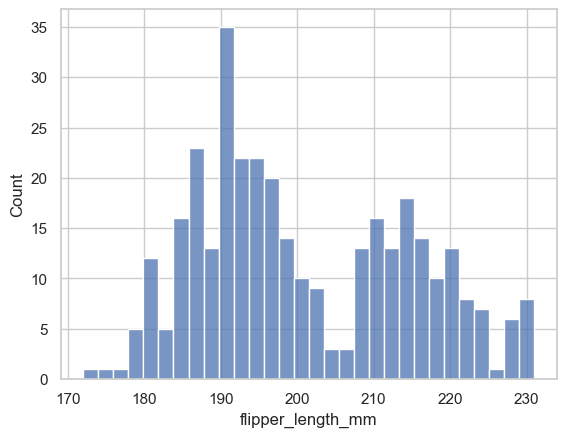

In [26]:
# bins 키워드 인수를 사용해서 bin의 개수를 지정할 수도 있다. 
# 아래에서는 30개의 bin을 만들고 이를 히스토그램으로 출력하고 있다.

# You can also define the total number of bins to use
sns.histplot(data = penguins, x = "flipper_length_mm", bins = 30)

## histplot() kde를 동시에 표시하기

In [27]:
# kde는 kernel density의 약자로 커널이라는 함수를 겹치는 방법으로 
# 히스토그램보다 부드러운 형태의 분포 곡선을 보여준다. 

# 아래 코드에서는 kde 키워드 인수에 True 값을
# 전달하여 히스토그램과 kde 그래프를 동시에 출력하고 있다.

# Add a kernel density estimate to smooth the histogram,
# providing complementary information about the shape of the distribution
sns.histplot(data = penguins, x = 'flipper_length_mm', kde = True)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

## histplot() hue 키워드 인수로 데이터 분리하기

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

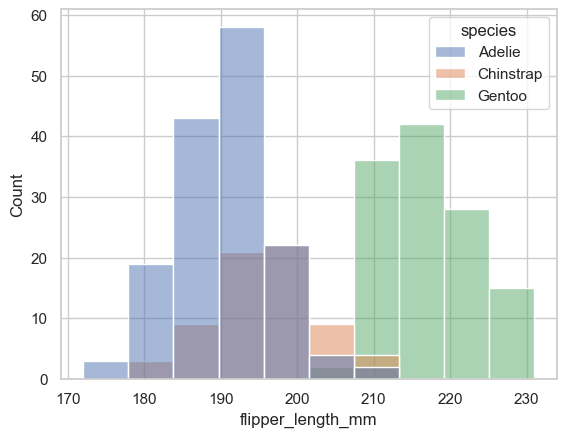

In [28]:
# hue 키워드 인수에 분류 기준이 될 column label을 전달해서 여러 개의 히스토그램을 합친
# 것과 같은 결과의 그래프를 얻을 수 있다. 
# 펭귄의 종류마다 분포를 나눴기 때문에 이제야 분포가 더 명확하게 보이는 것을 확인할 수 있다.

# draw multiple histograms from a long-form dataset with hue mapping
sns.histplot(data = penguins, x = 'flipper_length_mm', hue = 'species')

## histplot() 다양한 표현법 stack

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

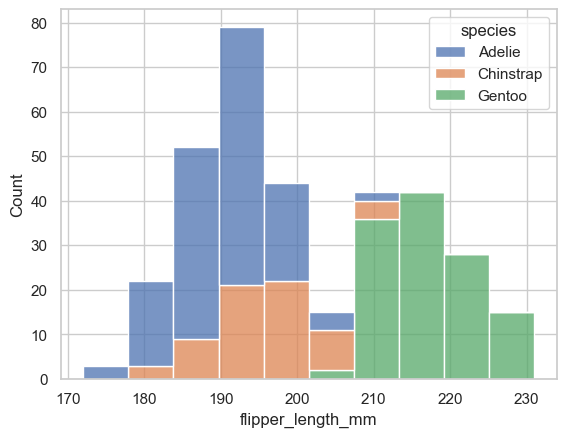

In [29]:
# 앞서 살펴봤던 예제는 각 히스토그램의 layer가 겹쳐서 표현됐다면 
# 이를 누적하듯 표현하는 방법도 있다. 
# multiple 키워드 인수에 “stack” 값을 전달하면 된다. 
# 펭귄의 종류별 누적 히스토그램을 아래와 같이 확인할 수 있다.

# can also "stack" them
sns.histplot(data = penguins, x = 'flipper_length_mm', hue = 'species', multiple = 'stack')

## histplot() 다양한 표현법 step

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

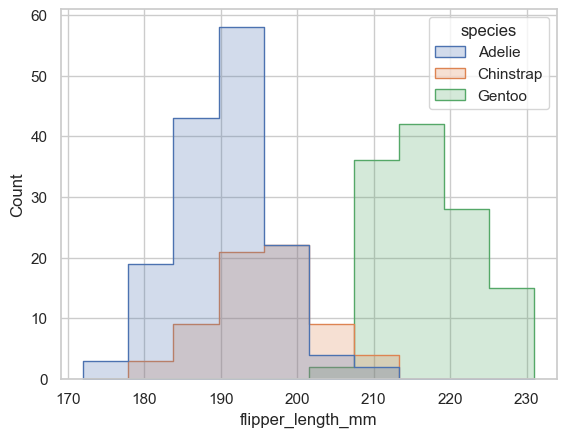

In [30]:
# 오버래핑된 결과가 보기 힘들 때의 해결 방법 중 하나로 elements 키워드 인수에 ‘step’
# 이란 값을 전달하여 아래의 그래프처럼 표현할 수 있다.

# Overlapping bars can be hard to visually resolve.
# A different approach would be to draw a step function
sns.histplot(penguins, x = 'flipper_length_mm', hue = 'species', element = 'step')

## histplot() 다양한 표현법 poly

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

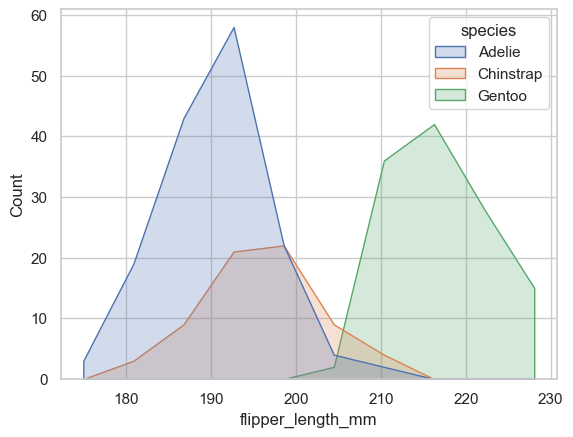

In [31]:
# 다각형 형태로도 표현 가능
# element 키워드 인수에 ‘poly’ 값을 전달하면 된다.
# 이는 전체적인 모양을 살피는데 더 유용함

# You can move even farther away from bars by drawing a polygon
# with verticles in the center of each bin.
# This may make it easier to see the shape of the distribution,
# but use with caution: it will be less obvious to your audience that they are
# looking at a histogram

sns.histplot(penguins, x = 'flipper_length_mm', hue = 'species', element = 'poly')

## histplot()의 다양한 표현법 etc

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

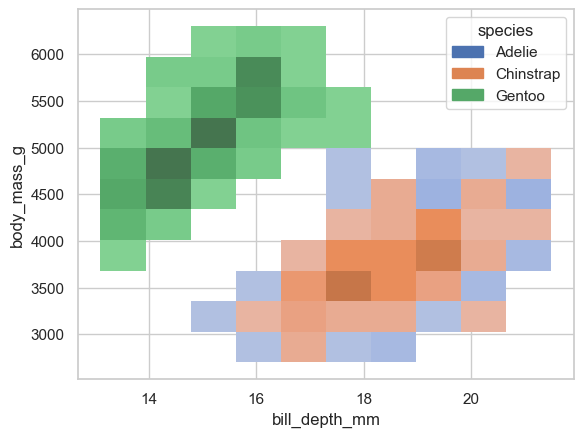

In [32]:
# x축과 y축 모두 column을 할당하게 되면 히트맵(heatmap) 형태의 히스토그램을 표현

# When both x and y are assigned,
# a bivariate histogram is computed and shown as a heatmap

sns.histplot(penguins, x = 'bill_depth_mm', y = 'body_mass_g', hue = 'species')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='species'>

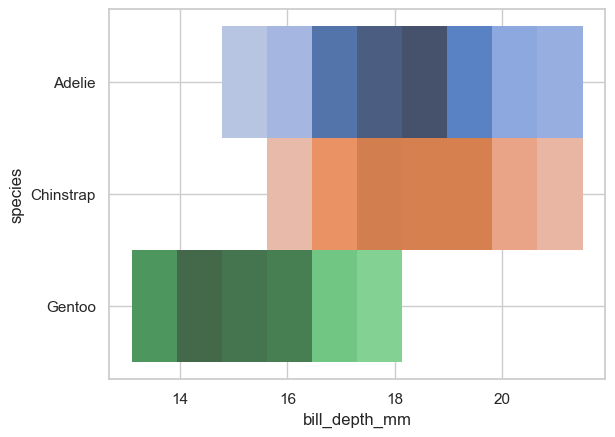

In [33]:
# x축과 y축 모두 column을 할당할 때 그 중 하나의 값이 이산된 값이라면 아래와 같이
# 데이터를 시각화하여 표현하면 훨씬 이해가 쉽게 표현할 수 있다.

# Multiple color maps can make sense when one of the variables is discrete
sns.histplot(
    penguins, x = 'bill_depth_mm', y = 'species', hue = 'species', legend = False
)

# 히스토그램 displot()

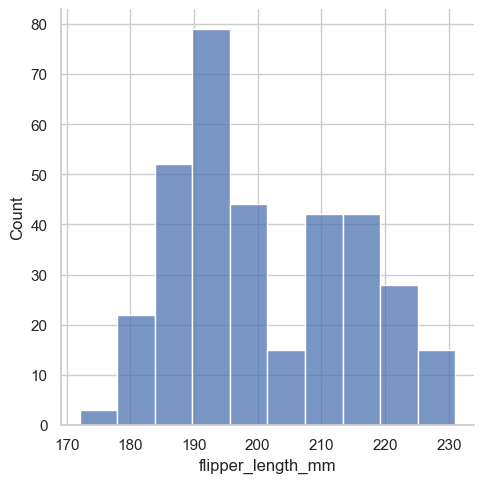

In [34]:
# displot()도 마찬가지로 1차원 혹은 2차원 데이터의 분포를 히스토그램으로 보여준다.
# 다만 rug와 kde에 대해 동시에 표현이 가능해서 표현 범위가 더 넓고 이에 따라 많이 사용한다.

# seaborn.displot(data = None, *, x = None, y = None, hue = None, row = None,
#                 col = None, weights = None, kind = 'hist', rug = False,
#                 rug_kws = None, log_scale = None, legend = True,
#                 palette = None, hue_order = None, hue_norm = None,
#                 color = None, col_wrap = None, row_order = None, col_order = None,
#                 height = 5, aspect = 1, facet_kws = None, **kwargs)


# The default plot kind is a histogram
sns.displot(data = penguins, x = 'flipper_length_mm')

## displot() kde로 표현하기

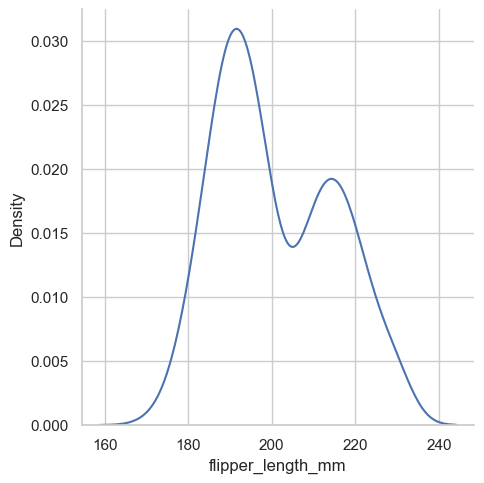

In [35]:
# kind 키워드 인수를 활용해서 기본적으로 표현되는 히스토그램의 종류를 kde로 변경

# Use the kind parameter to select a different representation
sns.displot(data = penguins, x = 'flipper_length_mm', kind = 'kde')

## displot() ecdf로 표현하기

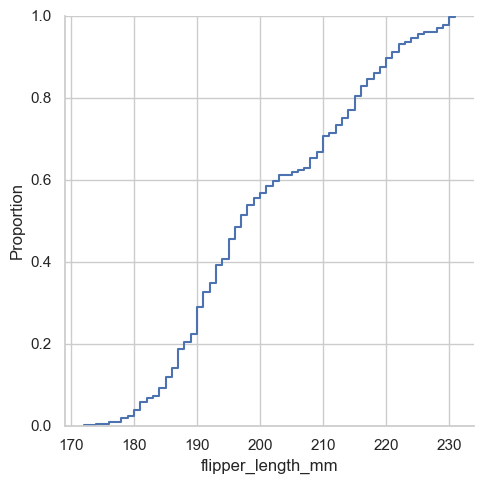

In [36]:
# 이번에는 kind 키워드 인수에 ecdf(empirical cumulative distribution functions)를
# 활용해서 누적 분포 그래프로 표현

# There are three main plot kind
# in addition to histograms and kernel density estimates (KDEs)
# you can also draw empirical cumulative distribution functions (ECDFs)
sns.displot(data = penguins, x = 'flipper_length_mm', kind = 'ecdf')

## displot() 히스토그램과 kde 동시에 표현하기

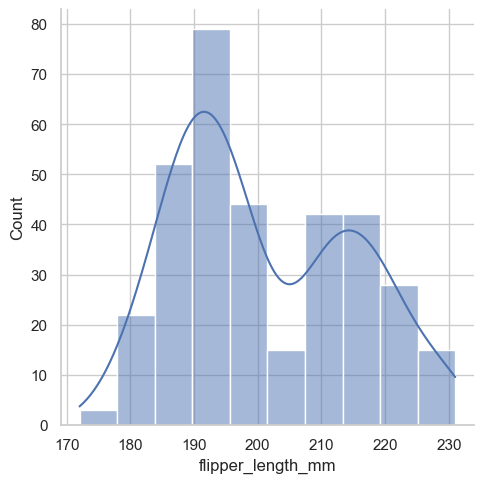

In [37]:
# kde 키워드 인수 값을 True로 전달하여 히스토그램과 kde를 동시에 표현하고 있습니다.

# While in histogram mode, it is also possible to add a KDE curve
sns.displot(data = penguins, x = 'flipper_length_mm', kde = True)

## displot() x, y 모두 값 할당하기

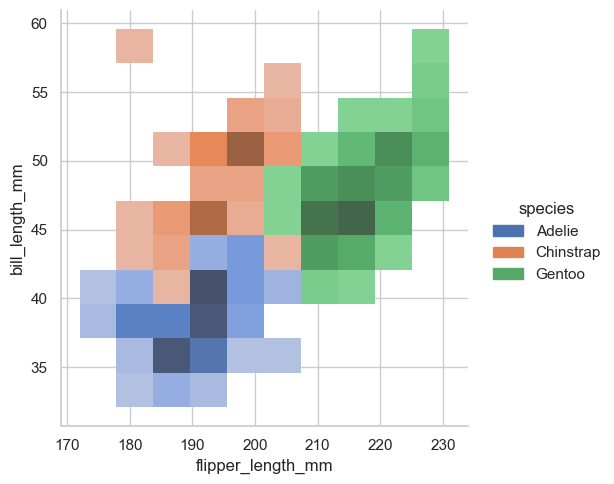

In [38]:
# histplot()과 동일하게 x와 y에 각각 값을 할당하여 히트맵 형태로 그래프를 출력할 수 있다.

# To draw a bivariate plot, assign both x and y
sns.displot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')
# hue를 통해 그룹별 색깔 구분이 가능해진다.

## displot() 2개 값을 kde로 표현하기

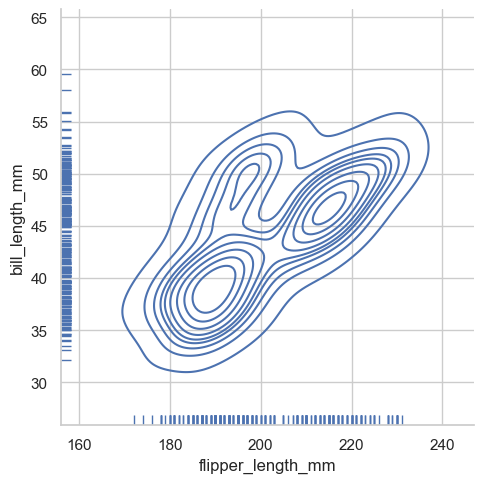

In [39]:
# x, y축 모두 할당한 앞의 히스토그램을 kde로도 표현 가능 
# 뿐만 아니라 rug=True 키워드 인수를 전달해서 rug에 대한 표현도 동시에 할 수 있다.

# Currently, bivariate plots are available only for histograms and KDEs
# show individual observations with a marginal 'rug'
g = sns.displot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm',
                kind = 'kde', rug = True)

## displot() hue로 subset 나누기

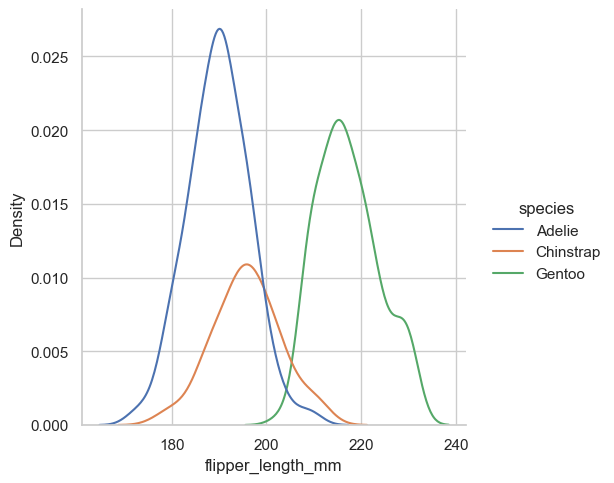

In [40]:
# hue 키워드 인수를 통해 subset을 구분하고 이를 각각의 그래프로 표현할 수 있다.
# 아래는 hue 값으로 species(펭귄의 종)에 대해 설정해서 각각 species별로 그래프 생성

# Each kind of plot can be drawn seperately for subsets of data using hue mapping
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', kind = 'kde')

## displot() col로 그래프 나누기

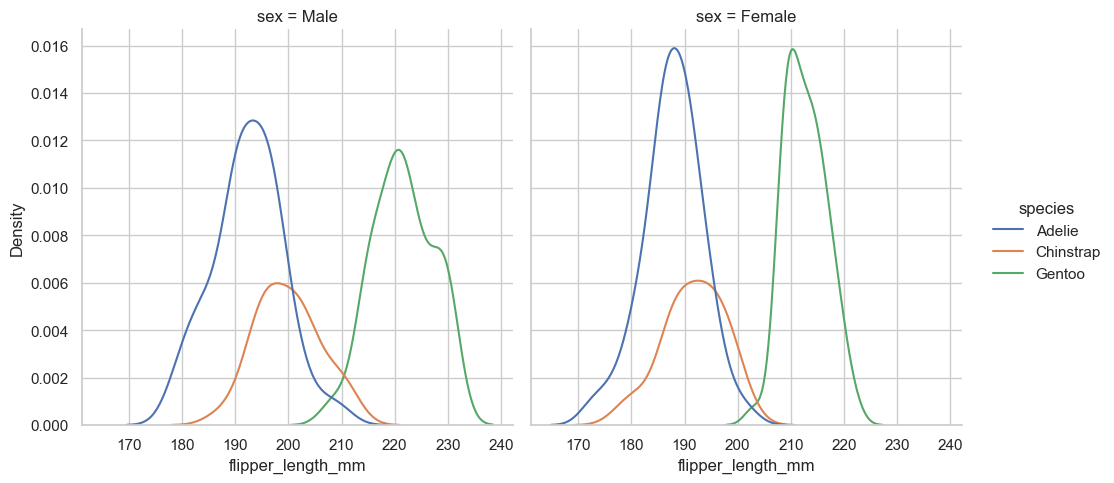

In [41]:
# displot()은 더 나아가 col 키워드 인수를 활용하여 subset을 한번 더 분류할 수 있다.
# col에 sex column label을 설정하여 subset을 이전 예제보다 더 나눔

# The figure is constucted using a FacetGrid,
# meaning that you can also show subsets on distinct subplots, or 'faceets'
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', col = 'sex', kind = 'kde')

## displot() 그래프 크기 설정

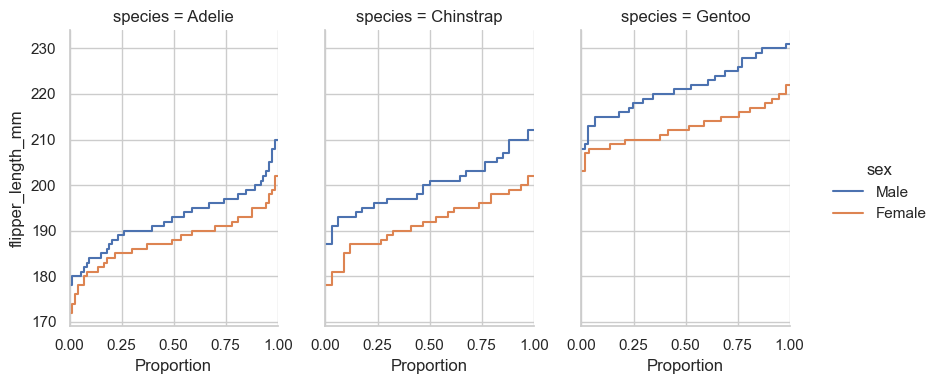

In [42]:
# height와 aspect를 활용해서 그래프 크기를 제어할 수 있다.
# height의 단위는 inches이며 aspect는 height와 aspect 값을 곱해서 얻는다. 
# 높이 대비 너비 비율을 지정한다고 이해하면 됨

# Because the figure is drawn with a FacetGrid, you control its size and shape with
# the height and aspect parameters

sns.displot(
    data = penguins, y = 'flipper_length_mm', hue = 'sex', col = 'species',
    kind = 'ecdf', height = 4, aspect = .7
)
# aspect는 height에 대한 비율이다.
# col 대신에 row를 쓰면 그래프로 세로로 정렬된다.

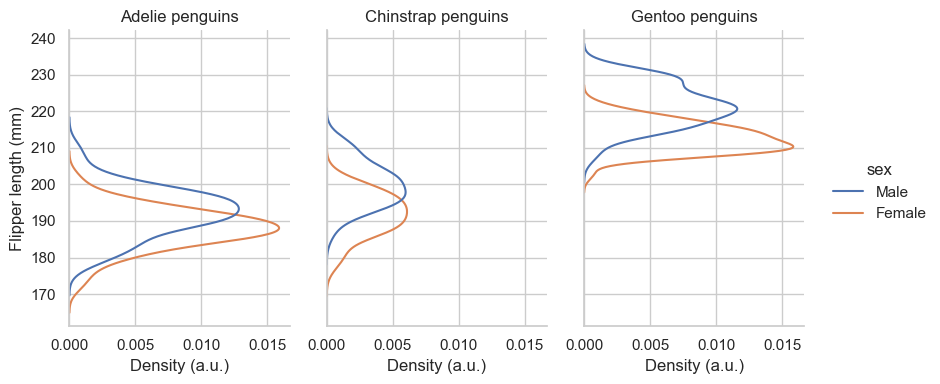

In [43]:
# 각 axis label과 title도 지정해줄 수 있다. 
# axis label은 set_axis_labels(xlabel, ylabel) 메서드를, 
# title은 set_titles()을 활용하는데, formatting keys인 {col_var}와 {col_name}
# 을 조합해서 포맷팅할 수 있다.

# The function returns the FacetGrid object with the plot,
# and you can use the methods on this object to customize it further
g = sns.displot(
    data = penguins, y = 'flipper_length_mm', hue = 'sex', col = 'species',
    kind = 'kde', height = 4, aspect = .7
)

g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} penguins")

# barplot()

In [44]:
# 바 플롯은 카테고리마다의 평균을 각 사각형의 길이로 편차를 에러바(error bar)로 표현
# 첫번째 인수로 data를 나머지를 키워드 인수로 전달한다.

# seaborn.barplot(data = None, *, x = None, y = None, hue = None, order = None,
#                 hue_order = None, estimator = 'mean', errorbar = ('ci', 95), 
#                 n_boot = 1000, units = None, seed = None, orient = None, 
#                 color = None, palette = None,
#                 saturation = 0.75, width = 0.8, errcolor = '.26', errwidth = None,
#                 capsize = None, dodge = True, ci = 'deprecated', ax = None, **kwargs)

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

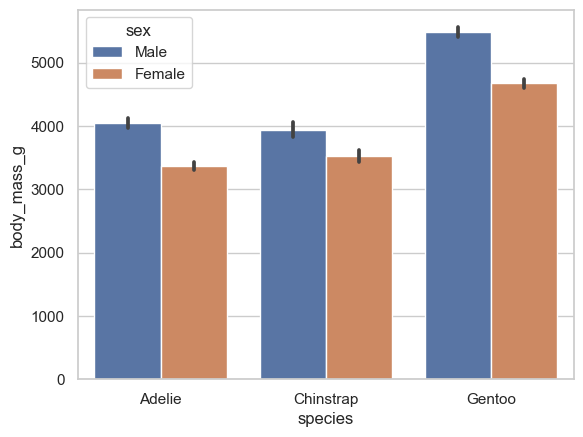

In [45]:
# x와 hue를 카테고리화해서 body_mass_g 값의 평균과 신뢰구간(confidence intervals)을
# 구해서 바 플롯으로 표현하고 있다.

# Group by a categorical variable and plot aggregated values, with confidence intervals
# Add a second layer of grouping
df = sns.load_dataset("penguins")
sns.barplot(data = df, x = 'species', y = 'body_mass_g', hue = 'sex')

# boxplot()

In [46]:
# 박스-휘스커 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 부른다. 
# 박스 플롯은 박스와 박스 바깥의 선(whisker)으로 이루어진다.

# 박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻한다. 
# 이 3사분위수와 1사분수의 차이(Q3 - Q1)를 IQR(interquartile range)라고 한다. 
# 박스 내부의 가로선은 중앙값을 나타낸다. 
# 박스 외부의 세로선은 1사분위 수보다 1.5 x IQR 만큼 낮은 값과
# 3사분위 수보다 1.5 x IQR 만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장
# 큰 데이터와 가장 작은 데이터를 잇는 선분이다. 
# 그 바깥의 점은 아웃라이어(outlier)라고 부르는데 일일히 점으로 표시한다.

# seaborn.boxplot(data = None, *, x = None, y = None, hue = None, order = None,
#                 hue_order = None, orient = None, color = None, palette = None,
#                 saturation = 0.75, width = 0.8, dodge = True, fliersize = 5
#                 linewidth = None, whis = 1.5, ax = None, **kwargs)

<AxesSubplot:xlabel='age'>

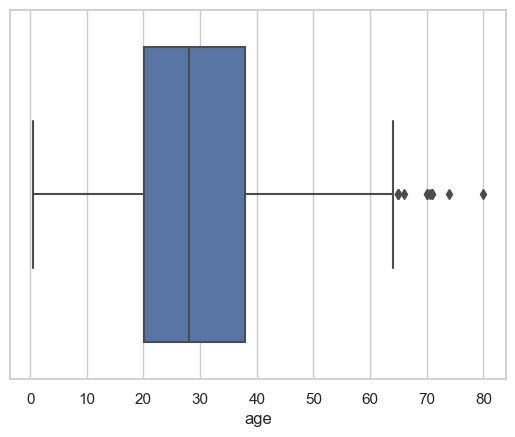

In [47]:
# 아래 예제에서는 boxplot() 메서드에 x 값으로 Series만을 전달
# 이 결과로 하나의 box plot을 수평하게 그림 
# 타이타닉호에 탑승한 사람들의 나이(age)에 대한 4분위를 그래프로 표현하고 있다.

# Draw a single horizontal boxplot,
# assigning the data directly to the coordinate variable

df = sns.load_dataset('titanic')
sns.boxplot(x = df.age)

<AxesSubplot:xlabel='age', ylabel='class'>

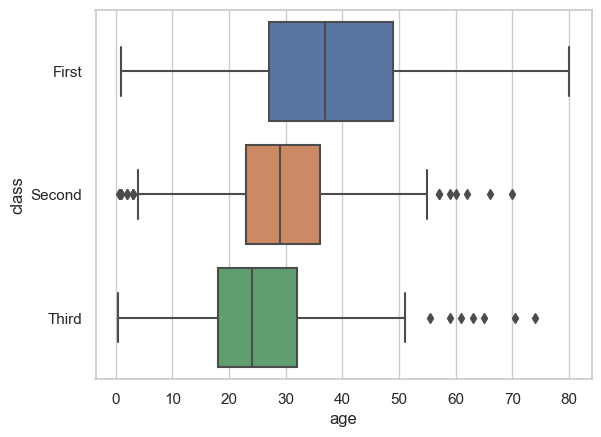

In [48]:
# 타이타닉호의 데이터셋 중 class column의 Dtype은 카테고리
# 이 카테고리화된 column을 하나의 분류 값으로 추가하기 위해서 y 키워드 인수로 설정
# 이렇게 하면 y축을 기준으로 카테고리별 box plot을 unique한 value의 개수만큼 나눠서 얻을 수
# 있다.

# Group by a categorical variable,
# referencing columns in a dataframe
sns.boxplot(data = df, x = 'age', y = 'class')

<AxesSubplot:xlabel='age', ylabel='class'>

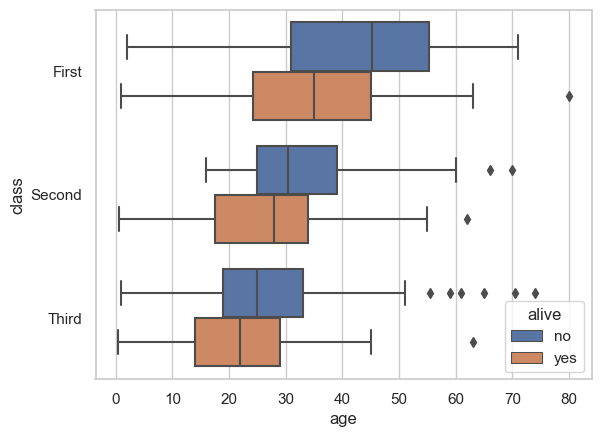

In [49]:
# x에 할당한 값에 대한 분포를 구하는데, y와 hue에 전달된 column을 기준으로 그룹화한
# 결과를 박스플롯으로 그리고 있다.

# Group by a categorical variable, referencing columns in a dataframe
# Draw a vertical boxplot with nested grouping by two variables
sns.boxplot(data = df, x = 'age', y = 'class', hue = 'alive')

<AxesSubplot:xlabel='fare', ylabel='alive'>

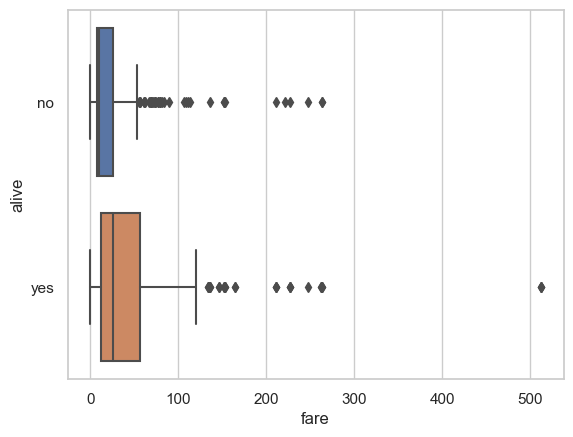

In [50]:
# box plot을 그렸는데 여러개로 출력된 그래프의 순서가 맘에 들지 않는 경우가 있을 수 있다.
# 그때는 order 키워드 인수를 사용하면 된다. 
# order 키워드 인수로 전달할 값을 리스트의 형태로 작성하면 되는데, 
# 원하는 차례로 ticklabel을 적으면 된다.

sns.boxplot(data = df, x = 'fare', y = 'alive')

<AxesSubplot:xlabel='fare', ylabel='alive'>

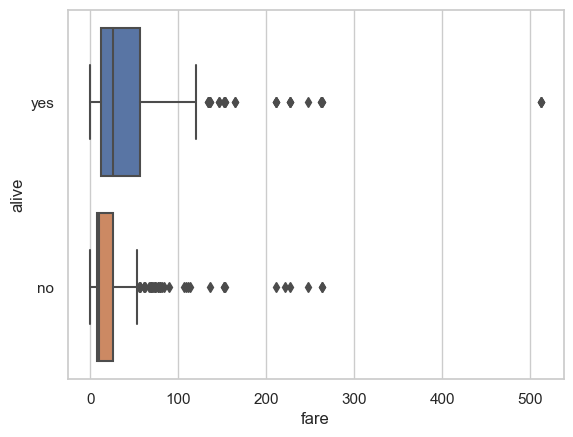

In [51]:
# Control the order of the boxes
sns.boxplot(data = df, x = 'fare', y = 'alive', order = ['yes', 'no'])

<AxesSubplot:>

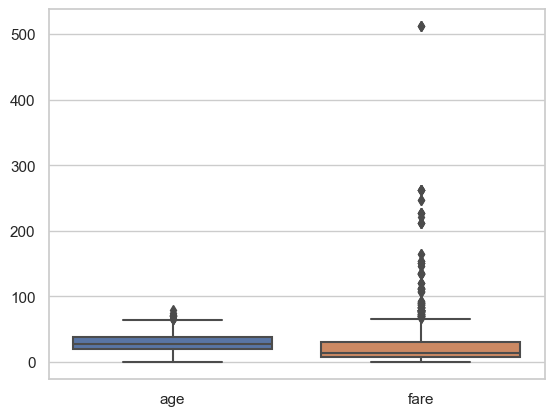

In [52]:
# 수치 값을 갖는 column 여럿을 동시에 하나의 box plot에 표현할 수 있다. 
# data키워드 인수로 DataFrame을 전달할 때 그래프로 표현하고 싶은 수치 값을 갖는
# column들을 인덱싱해서 DataFrame 형태로 전달하면 된다.

# 또 box plot의 방향을 바꾸고 싶으면 orient 키워드 인수에 h(수평), v(수직) 값을 줘서
# 설정하면 된다.

# Draw a box for multiple numeric columns
sns.boxplot(data = df[['age', 'fare']], orient = 'v')

# violinplot()

In [53]:
# box plot과 kde(커널 밀도 함수) 둘을 콤비네이션한 그래프
# 그런데 마치 그 생김새가 바이올린 같다하여 violin plot이라고 불린다. 
# 세로 방향으로 kde의 모양을 그리는데 kde가 좌우 대칭되게 그려진다.

# 그 규칙은 box and whisker plot과 비슷하다. 
# 하나 이상의 카테고리 column을 가지고 데이터의 분포를 나란히 그린다. 
# 그래서 그 그래프들의 분포를 비교하기에 적합하다.
# 샘플 사이즈에 따라 분포에 영향이 있을 수 있으므로 그 점을 참고해서 사용해야 한다.

# seaborn.violinplot(data = None, *, x = None, y = None, hue = None, order = None,
#                    hue_order = None, bw = 'scott', cut = 2, scale = 'area',
#                    scale_hue = True, gridsize = 100, width = 0.8, inner = 'box',
#                    split = False, dodge = True, orient = None, linewidth = None,
#                    color = None, palette = None, saturation = 0.75, ax = None,
#                    **kwargs)

<AxesSubplot:xlabel='age'>

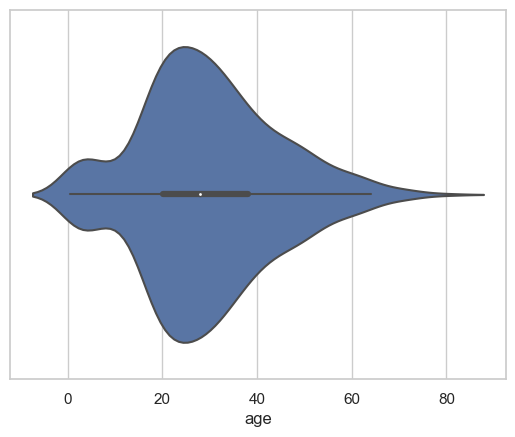

In [54]:
# violinplot() 메서드에 x 키워드 인수만 값을 Series로 할당하여 violin plot을 그림
# Series 값으로 그래프를 그리면 기본적으로 수평 방향의 그래프를 그린다.

# Draw a single horizontal boxplot,
# assigning the data directly to the coordinate variable

df = sns.load_dataset('titanic')
sns.violinplot(x = df.age)

<AxesSubplot:xlabel='age', ylabel='class'>

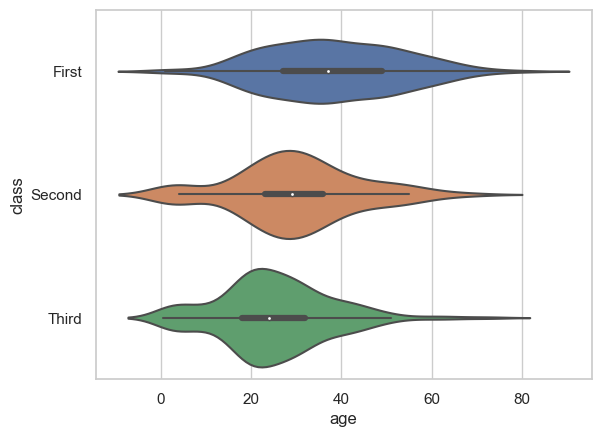

In [55]:
# 카테고리 Dtype을 갖는 class column을 활용하여 y축의 값으로 설정 
# 그렇게 하면 각 카테고리마다 갖는 데이터 분포를 y축을 기준으로 하여 분리해서 
# 그릴 수 있다. 
# x축에 수평하게 그래프를 그려내고 있다.

# Group by a categorical variable,
# refreshiing columns in a dataframe

sns.violinplot(data = df, x = 'age', y = 'class')

<AxesSubplot:xlabel='class', ylabel='age'>

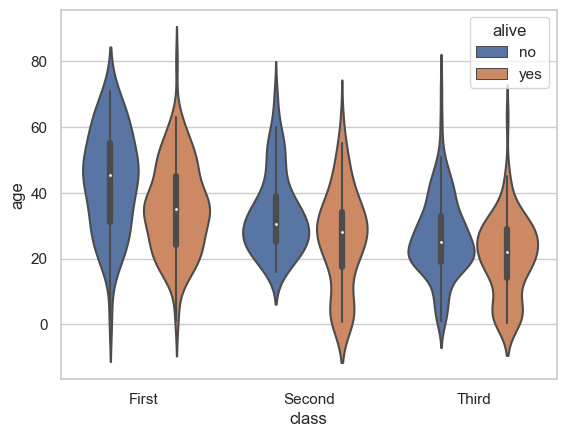

In [56]:
# x 키워드 인수에 카테고리 자료형을 설정하고 있다. 
# 이에 따라 violin plot의 방향이 vertical 하게 변경된 것을 확인할 수 있다.

# Draw vertical violins, grouped by two variables
sns.violinplot(data = df, x = 'class', y = 'age', hue = 'alive')

<AxesSubplot:xlabel='deck', ylabel='age'>

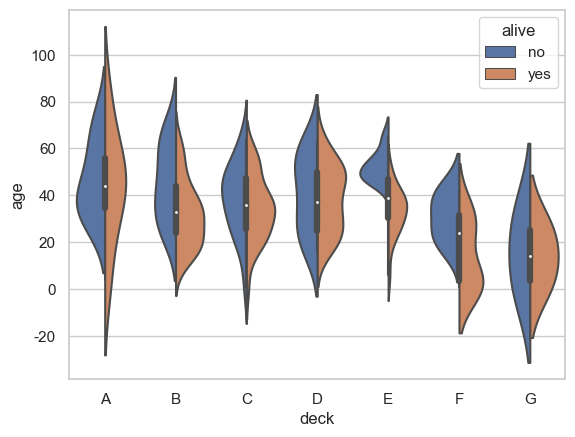

In [57]:
# violin의 그래프가 hue에 설정한 alive column의 값에 따라 좌측, 우측 각각 분포를
# 그려내고 있다. 
# split 키워드 인수에 True 값을 전달하는 조건으로 hue에 설정된 값의
# level이 단 두개여야 한다. 
# 즉 현재 hue에 설정된 alive가 갖는 값이 ‘yes’와 ‘no’ 단
# 두개이기 때문에 split 키워드 인수에 True 설정을 할 수 있는 것이다.

# Draw split violins to take up less space 
sns.violinplot(data = df, x = 'deck', y = 'age', hue = 'alive', split = True)

<AxesSubplot:xlabel='deck', ylabel='age'>

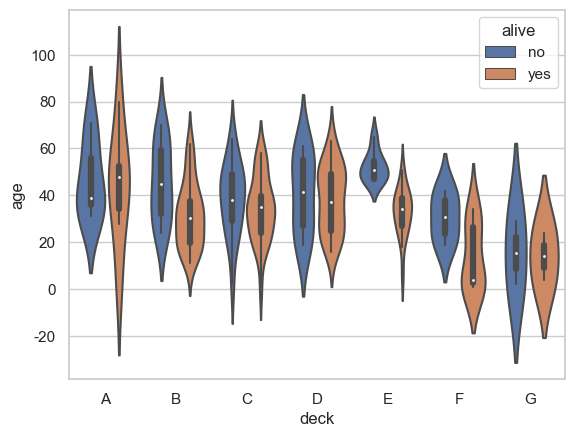

In [58]:
sns.violinplot(data = df, x = 'deck', y = 'age', hue = 'alive', split = False)
# split을 통해 공간을 절약

In [59]:
# 만약 hue의 level이 정확히 2개가 아니라면 어떤 결과가 나올까?

# 실행 조차 안 되고 ValueError를 반환 
# split 키워드 인수의 값을 True로 하고 싶다면 반드시 hue에 오는 
# column의 값이 단 2가지만으로 분류되어야 한다.

# Draw split violins to take up less space
# sns.violinplot(data = df, x = 'deck', hue = 'class', split = True) # 여기서 에러 발생
# class에는 값이 3개이므로 split 상태에서 hue로 못 쓴다.

<AxesSubplot:xlabel='age', ylabel='alive'>

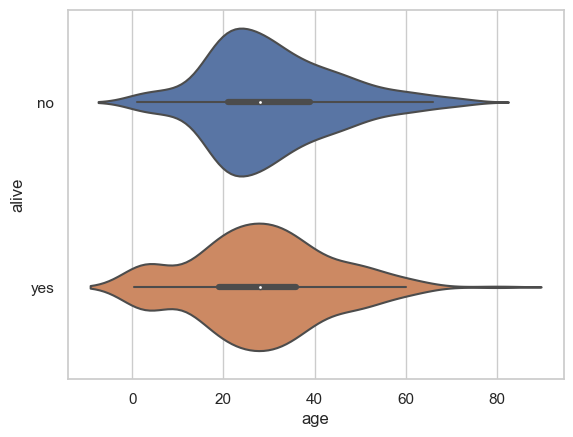

In [60]:
# violin plot을 표현할 때 범위를 제한할 수 있다. 
# 타이타닉호 데이터셋에서 나이(age)의 경우에 0 미만의 범위에 대해 그래프가 표현될 수 있다. 
# 나이의 데이터 특성상 음수는 있을 수 없기 때문에 이런 표현은 바람직하지 않다.

# Present the density from smoothing beyond the limits of the data
sns.violinplot(data = df, x = 'age', y = 'alive')

In [61]:
# 값의 표현 범위를 명확히 하기 위해서 cut이라는 키워드 인수를 사용할 수 있다. 
# cut키워드 인수에 0 값을 작성하면 가지고 있는 데이터의 범위를 
# 초과해서 그래프가 표현되지 않는다. 
# 0 이외의 실수 값을 입력하면 대역폭(bandwidth)의 크기가 된다.

# Prevent the density from smoothing beyond the limits of the data
sns.violinplot(data = df, x = 'age', y = 'alive', cut = 0)

<AxesSubplot:xlabel='age', ylabel='alive'>

<AxesSubplot:xlabel='age', ylabel='alive'>

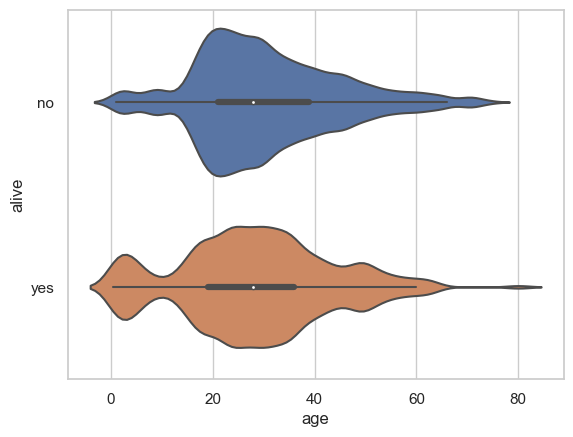

In [62]:
# kde의 그래프 모양을 부드럽게 처리하다보면 대역폭의 크기가 커진다. 
# 이를 줄이기 위해선 bw 키워드 인수에 소수 값을 갖는 비율을 설정해주면 된다.

# Use a narrower bandwidth to reduce the amount of smoothing
sns.violinplot(data = df, x = 'age', y = 'alive', bw = .15)

In [63]:
# violin plot 내부에 데이터의 분포를 직접적으로 표현할 수도 있다.
# inner 키워드 인수에 stick이란 값을 전달하면 된다. 
# 아래의 예제를 보면 inner 키워드 인수에
# stick이란 값을 전달하여 데이터의 분포를 그래프 안에 표현

# Represent every observation inside the distribution
sns.violinplot(data = df, x = 'age', y = 'embark_town', inner = 'stick')

<AxesSubplot:xlabel='age', ylabel='embark_town'>

<AxesSubplot:xlabel='age', ylabel='embark_town'>

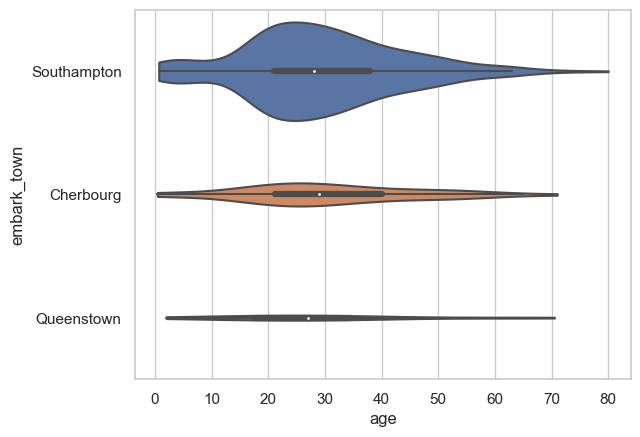

In [64]:
# scale에 따라 각 그래프의 크기가 달라진다. 
# scale은 총 area, count, width의 값을 지정할 수 있으며 기본 값은 area 
# area는 violin의 영역 너비가 같게 그려진다.
# count는 실제 갖는 데이터 개수에 따라 그 violin의 크기가 달라진다. 
# width는 violin이 동일한 폭을 갖게 된다.

# Use a different scaling rule for normalizing the density
sns.violinplot(data = df, x = 'age', y = 'embark_town', scale = 'count', cut = 0)

# stripplot()

In [65]:
# strip plot은 카테고리마다의 scatter plot을 그린다. 
# 그리는 방식으론 jitter를 사용하는데 이 방식은 다른 축의 방향으로 
# 랜덤하게 점을 찍어 겹치는 부분을 줄인다.

# 이 방식은 box plot과 violin plot의 보완이될 수 있다.

# seaborn.stripplot(data = None, *, x = None, y = None, hue = None, order = None,
#                   hue_order = None, jitter = True, dodge = False, orient = None,
#                   color = None, palette = None, size = 5, edgecolor = 'gray', 
#                   linewidth = 0, hue_norm = None, native_scale = False,
#                   formatter = None, legends = 'auto', ax = None, **kwargs)

<AxesSubplot:xlabel='total_bill'>

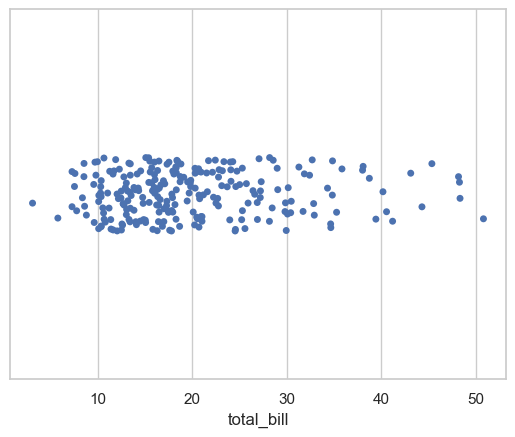

In [66]:
# 단 하나의 숫자형 column을 할당한 경우에는 각 점들이 다른 축의 방향으로 랜덤하게
# “jittered”된 단일 변량에 대한 분포(univariate distribution)의 형태를 보여준다.

# Assigning a single numeric variable shows
# its univariate distribution
# with points randomly 'jittered' on the other axis

tips = sns.load_dataset('tips')
sns.stripplot(data = tips, x = 'total_bill')

In [67]:
# y축의 방향에 카테고리 변량을 추가 
# 각 카테고리에 해당되는 데이터들의 분포 형태를 비교할 수 있음

# Assigning a second variable splits the strips of points
# to compare categoriccal levels of that variable
sns.stripplot(data = tips, x = 'total_bill', y = 'day')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

In [68]:
# x축에 카테고리 타입을 y축에 숫자 타입 데이터를 설정하면 앞의 예제와는 대조되게
# vertical한 모양으로 그래프를 그릴 수 있다.

# Show vertically-oriented strips by swapping
# the assingnment of the categorical and numerical variables
sns.stripplot(data = tips, x = 'day', y = 'total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

<AxesSubplot:xlabel='total_bill', ylabel='day'>

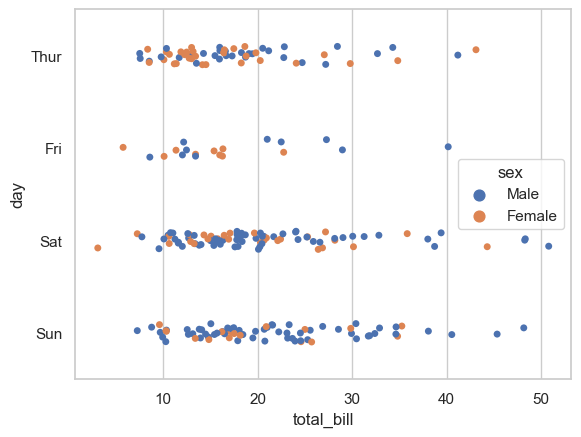

In [69]:
# hue 키워드 인수를 추가해서 변량을 하나 더 추가할 수 있다. 
# 그럼 분류의 개수가 더 늘어 그래프를 쉽게 파악하는데 도움이 될 수 있다.

# Or you can assign a distinct variable to hue to show a multidimensial relationship
sns.stripplot(data = tips, x = 'total_bill', y = 'day', hue = 'sex')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

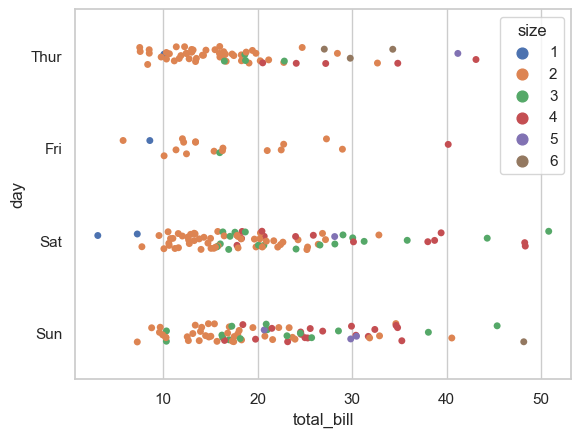

In [70]:
# 앞의 예제에서는 hue 키워드 인수에 카테고리 column을 지정했는데, 이산형 숫자 타입의
# 데이터를 갖는 column도 지정할 수 있다.

# If the hue variable is numeric, 
# it will be mapped with a quantitative palette by default
# (note that this was not the case prior to version 0.12)
sns.stripplot(data = tips, x = 'total_bill', y = 'day', hue = 'size')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

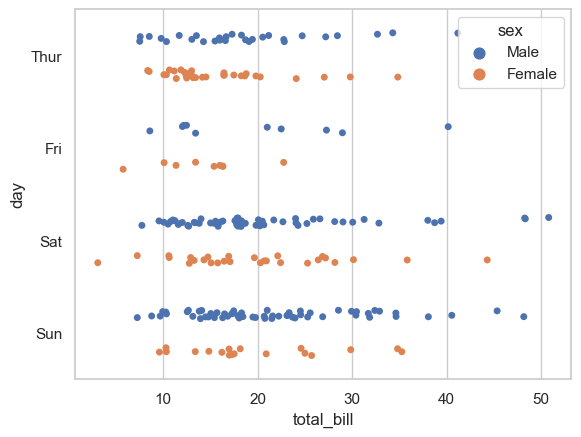

In [71]:
# 아래의 예제처럼 dodge=True 키워드 인수를 통해 hue로 나눈 카테고리 값을 완전히
# 분리시켜 그래프로 표현할 수도 있다.

# By default, the different levels of the hue variable are intermingled in each strip,
# but setting dodge = True will split them
sns.stripplot(data = tips, x = 'total_bill', y = 'day', hue = 'sex', dodge =True)

# swarmplot()

In [72]:
# swarm plot은 strip plot과 매우 흡사하다.
# 하지만 swarm plot에서는 데이터를 마커로 표현할 때 절대로 겹치지 않게 표현한다.
# 그 점에서 strip plot(다른 축의 방향으로
# 랜덤하게 찍을 뿐 겹치게도 찍음)과 차이점을 갖는다.
# 정확한 데이터의 분포를 표현하기에 더 없이 좋은 그래프이지만, 
# 아주 큰 스케일의 데이터를 표현하기에 필요한
# 너비가 너무 넓어져 이때는 swarm plot을 사용하기에 적합하지 않다.

# seaborn.swarmplot(data = None, *, x = None, y = None, hue = None, order = None,
#                   hue_order = None, dodge = False, orient = None,
#                   color = None, palette = None, size = 5, edgecolor = 'gray', 
#                   linewidth = 0, hue_norm = None, native_scale = False,
#                   formatter = None, legends = 'auto', warn_thresh = 0.05,
#                   ax = None, **kwargs)

<AxesSubplot:xlabel='total_bill'>

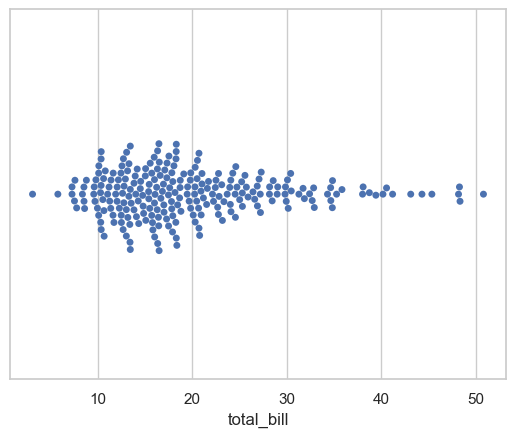

In [73]:
# 숫자 값을 갖는 데이터의 단일 변량의 분포를 swarm plot으로 표현하고 있다.
# 아래 그래프에서도 살펴볼 수 있듯이 각각의 데이터 마커가 서로 겹치지 않게 표현하고 있다.

# Assigning a single numeric variable shows its univariate distribution
# with points adjusted along on the other axis such that they don't overlab

tips = sns.load_dataset('tips')
sns.swarmplot(data = tips, x = 'total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

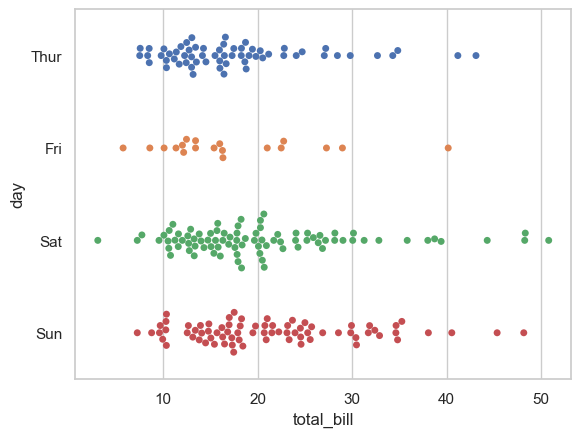

In [74]:
# y값에 카테고리 자료형을 갖는 column을 추가함으로써 각 카테고리마다의 swarm
# plot으로 쪼갬. 
# 아래 예제에서는 각 요일별 총 지출액에 대한 분포를 나타내고 있다.

# Assinging a second variable spits
# the groups of points to compare categorical levels of that variable
sns.swarmplot(data = tips, x = 'total_bill', y = 'day')

In [75]:
# swarm plot을 vertical 방향으로 표현하려면 x 값에 카테고리 자료형을 y 값에 숫자형
# 데이터를 설정해주면 된다. 
# 직전의 예제와 축의 방향이 반대가 됐음을 확인할 수 있다.

# Show vertically-oriented swarms by swapping
# the assignment of the categorical and numerical variables
sns.swarmplot(data = tips, x = 'day', y = 'total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

<AxesSubplot:xlabel='total_bill', ylabel='day'>

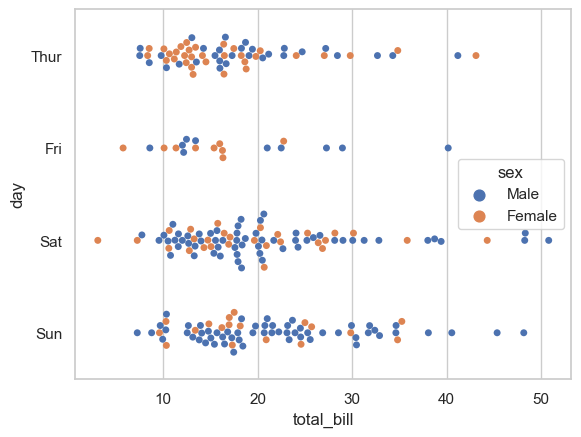

In [76]:
# hue 키워드 인수를 추가해서 변량을 하나 더 추가할 수 있다. 
# 그럼 분류의 개수가 더 늘어 그래프를 쉽게 파악하는데 도움이 될 수 있다.

# Or you can assign a distinct variable to hue to show a multidimensional relationship
sns.swarmplot(data = tips, x = 'total_bill', y = 'day', hue = 'sex')

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

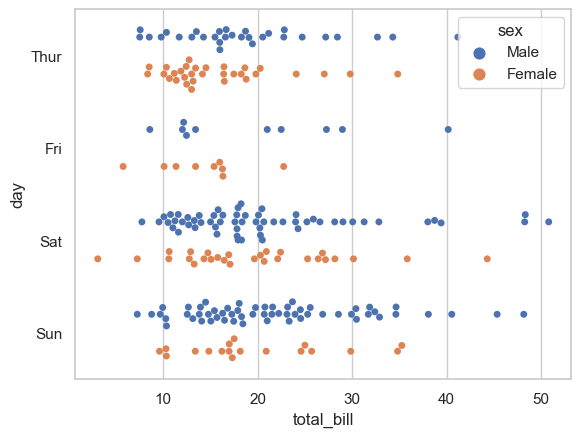

In [77]:
# 아래의 예제처럼 dodge=True 키워드 인수를 통해 hue로 나눈 카테고리 값을 완전히
# 분리시켜 그래프로 표현할 수도 있다. 
# 다만 앞의 strip plot과 다르게 swarm plot은 그래프의 크기가 데이터를 표현할만큼 
# 충분히 크지 않으면 표현에 생략된 마커가 발생될 수 있다.

# By default, the different levels of the hue variable are intermingled
# in each swarm, but setting dodge = True will split them
sns.swarmplot(data = tips, x = 'total_bill', y = 'day', hue = 'sex', dodge = True)

# 데이터가 크면 swarmplot을 쓰지만 데이터가 작다면 많으면 오류가 생기므로 splitplot 활용

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1378: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(swarm_data, cat_pos, s=s, **kws)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

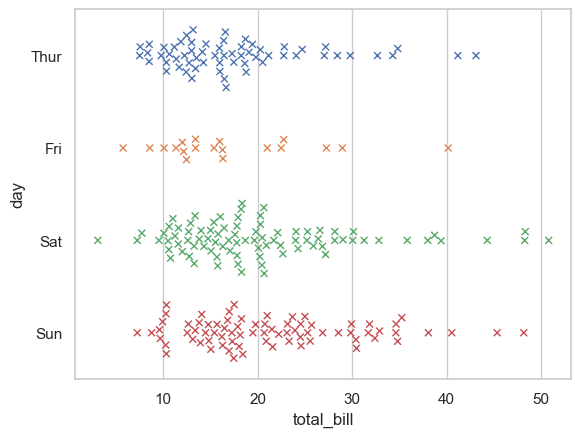

In [78]:
# scatter() 메서드의 키워드 인수를 작성해서 사용자가 원하는 시각적 효과를 커스텀하게
# 적용시킬 수 있다.

# Further visual customization can be achieved by passinng keyword arguments
# for matplotlib.axes.Axes.scatter()

sns.swarmplot(
    data = tips, x = 'total_bill', y = 'day',
    marker = 'x', linewidth = 1
)

# catplot()

In [79]:
# categorical plot인 catplot은 axes-level(row, col)까지 분류를 나눌 수 있다. 
# 즉 catplot은 카테고리화를 더 세분화해서 작업할 수 있는 플롯

# 뿐만 아니라 kind 키워드 인수를 사용하면 axes-level에 사용할 그래프의 유형을 선택할 있다.

# seaborn.catplot(data = None, *, x = None, y = None, hue = None, row = None, col = None,
#                 col_wrap = None, estimator = 'mean', errorbar = ('ci', 95),
#                 n_boot = 1000, units = None, seed = None, order = None, hue_order = None,
#                 row_order = None, col_order = None, height = 5, aspect = 1, kind = 'strip',
#                 native_scale = False, formatter = None, orient = None, color = None,
#                 pallete = None, hue_norm = None, legend = 'auto', legent_out = True,
#                 sharex = True, sharey = True, margin_titles = False, facet_kws = None,
#                 ci = 'deprecated', **kwargs)

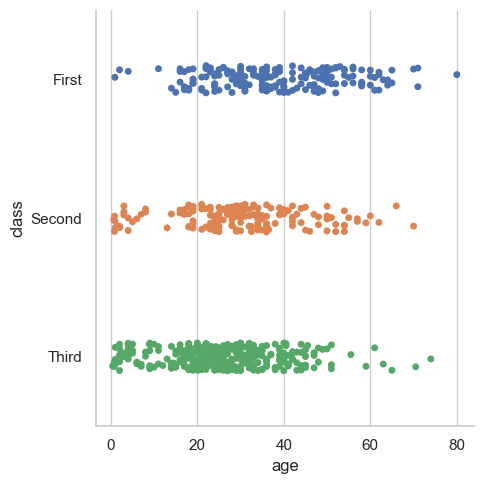

In [80]:
# kind를 선택않고 catplot()의 결과를 살펴보면 jittered strip plot의 결과를 얻을 수 있다.
# jittered strip plot은 각 축을 기준하여 데이터의 분포를 점으로 표현하는데,
# 이때 점들이 최대한 겹치지않도록 세로 방향으로 무작위로 위치를 찍어주는 플롯

# By default, the visual representation will be a jittered strip plot
df = sns.load_dataset('titanic')
sns.catplot(data = df, x = 'age', y = 'class')

# catplot()은 dataframe 형태의 결과를 잘 보여주지만 pivot 된 거라면 잘 안 나온다.

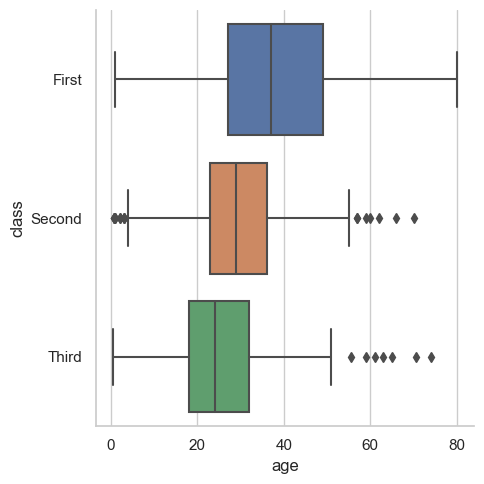

In [81]:
# kind 키워드 인수에 box라는 문자열을 전달하면 결과물을 box plot으로 표현해준다.

# Use kind to select a different representation
sns.catplot(data = df, x = 'age', y = 'class', kind = 'box')

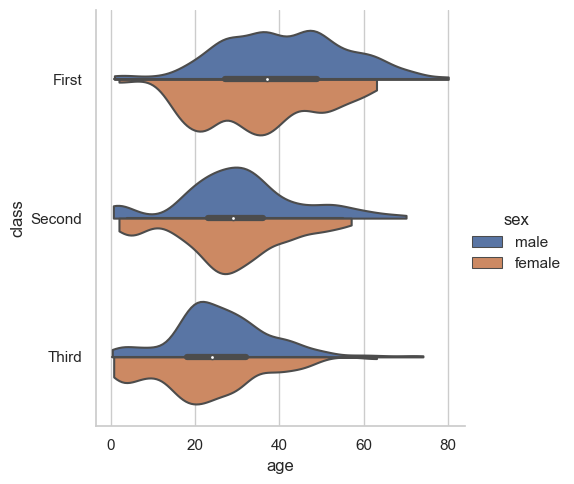

In [82]:
# kind를 violin으로 하면 커널 밀도 히스토그램을 그려준다
# (모양이 바이올린 같다하여 violin plot입니다).

# hue를 sex column에 따라 분류했고 split
# 키워드 인수에 True 값을 전달했기 때문에
# 가운데를 기준으로 성별에 따라 커널 밀도 함수가
# 표현되어 비대칭되게 표현되고 있다.

# Additional keyword arguments get passed through
# to the underlying seaborn function

sns.catplot(
    data = df, x = 'age', y = 'class', hue = 'sex',
    kind = 'violin', bw = .25, cut = 0, split = True
)

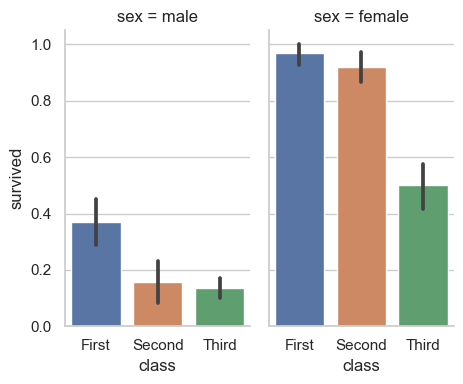

In [83]:
# 이번엔 kind를 bar plot으로 하고 있다.

# 그런데 더 주목할 점은 axes가 2개인 것처럼 표현했다는 것이다.
# col키워드 인수에 sex column name을 설정하였기에 sex 분류에 따라
# 그래프가 col 단위로 쪼개짐.
# 그래서 axes-level 단위로 분류 가능하다고 하는 것이다.

# Assigning a variable to col or row will automatically create subplots.
# Control figure size with the height and aspect parameters
sns.catplot(
    data = df, x = 'class', y = 'survived', col = 'sex',
    kind = 'bar', height = 4, aspect = .6
)

<AxesSubplot:xlabel='age', ylabel='class'>

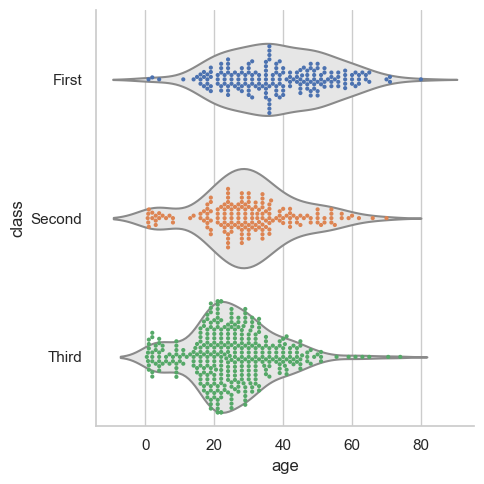

In [84]:
# 연속해서 그래프를 그리는 메서드를 여러 차례 사용하면 그에 해당하는
# 그래프 레이어가 겹쳐서 보이게 된다.

# swarmplot은 jittered strip plot과 흡사해보이지만 다르다. 
# jittered strip plot은 병렬한 방향이지만
# 정해진 범위 내에 랜덤하게 찍어서 최대한 겹치지 않게 한 방식이고,
# swarmplot은 완전히 겹치지 않게 병렬로 점을 찍어 표현하는 방식이다.

# For single-subplot  figures, it is easy to layer different representations
sns.catplot(data = df, x = 'age', y = 'class', kind = 'violin', color = ".9", inner = None)
sns.swarmplot(data = df, x = 'age', y = 'class', size = 3)

# jointplot()

In [85]:
# 두 개의 변수의 분포를 나타낼 때 활용하면 좋은 플롯입니다. histogram과 scatter plot을
# 동시에 사용해서 시각적 효과를 표현한다.

# seaborn.jointplot(data = None, *, x = None, y = None, hue = None, kind = 'scatter',
#                   height = 6, ratio = 5, space = 0.2, dropna = False, xlim = None,
#                   ylim = None, color = None, palette = None, hue_order = None, 
#                   hue_norm = None, marginal_ticks = False, joint_kws = None,
#                   marginal_kws = None, **kwargs)

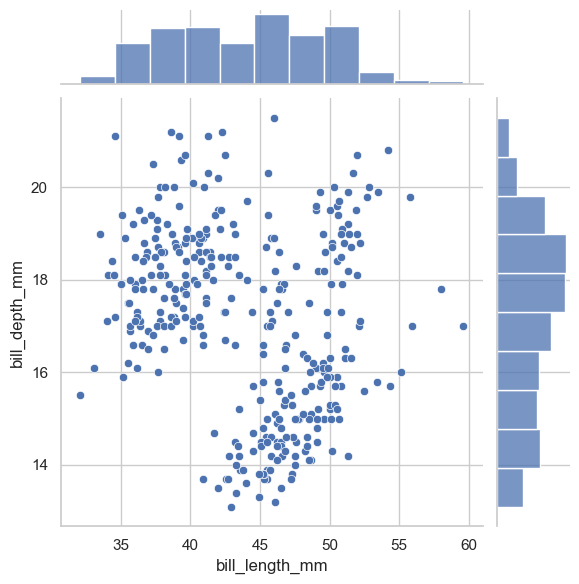

In [86]:
# jointplot() 메서드를 사용하면 작성할 수 있다.
# 이때 data 키워드 인수로 penguins의 DataFrame을 전달
# x에는 DataFrame의 column name인 bill_length_mm, 
# y에는 DataFrame의 column name인 bill_depth_mm을 전달

# In the simplest invocation,
# assign x and y to create a scatterplot(using scatterplot())
# with marginal histograms (using histplot())

penguins = sns.load_dataset('penguins')
sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm')

# histplot()과 scatterplot()을 동시에 사용해서 데이터의 분포를 더 자세하고 직관적으로 파악할 수 있다.
# 하지만 아래 차트로는 어떤 특징을 찾기 어렵다.

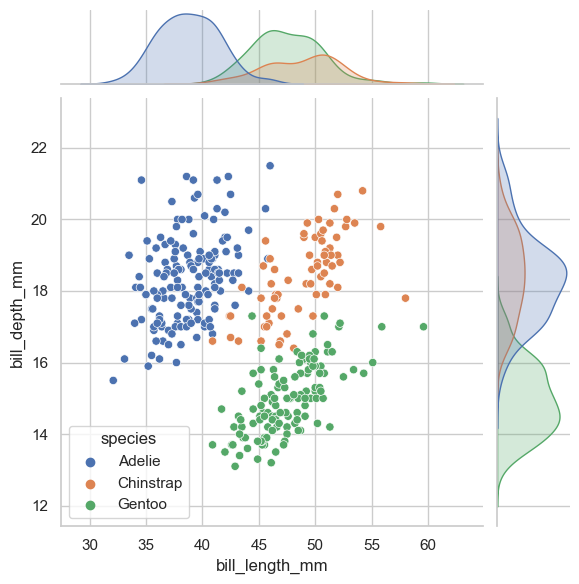

In [87]:
# hue 키워드 인수를 활용하여 species column에 대한 변수를 하나 더 추가함

# 앞의 그래프와 달리 scatter plot에 species별로 색상이 다르게
# 적용되었고 히스토그램으로 표현된 분포가 자동적으로 kde로 변경된 것을 확인 가능

# 펭귄의 종에 따른 분포가 나뉘는 것을 시각적으로 쉽게 확인할 수 있게 됨.

# Assigning a hue variable will add conditional colors to the scatterplot
# and draw seperate density curves (using kdeplot()) on the marginal axes

sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')

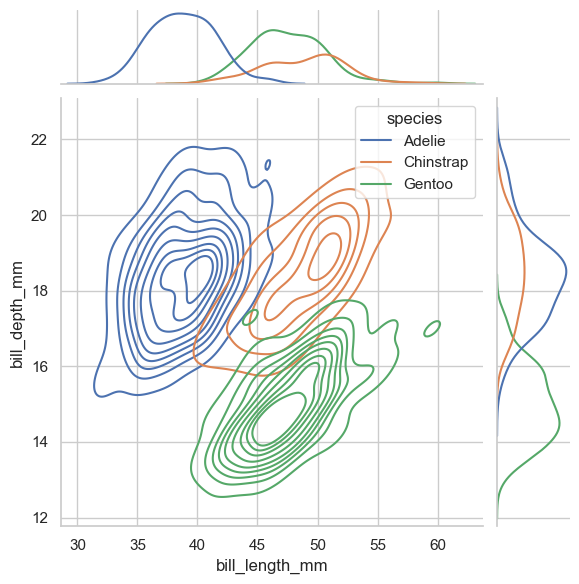

In [88]:
# kind 키워드 인수를 하나 추가하고 그 값으로 kde를 전달
# 그 결과로 scatter 분포가 kde의 형태를 띄면서 값의 밀도가 더 눈에
# 잘 보이도록 변경된 것을 확인할 수 있다.

# Several different approaches to plotting are available through the kind parameter.
# Setting kind = 'kde' will draw both bivariate and univariate KDEs
sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', 
              hue = 'species', kind = 'kde')

# 안쪽으로 들어갈수록 더 밀도가 높다.

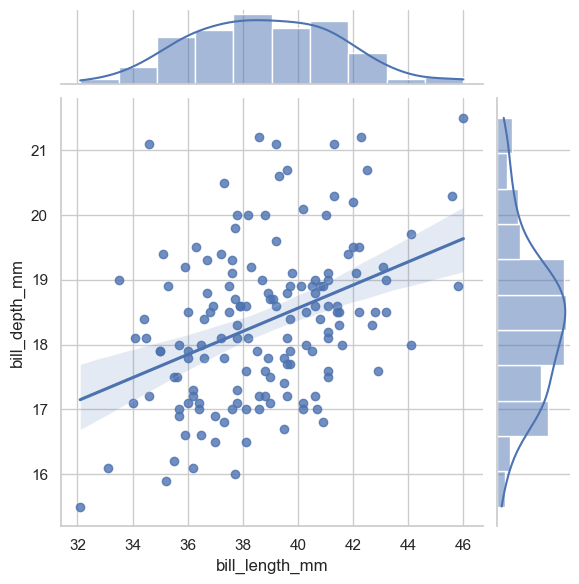

In [89]:
# kind 키워드 인수에 reg 값을 전달해서 선형 회귀에 대한 결과를
# 그래프로 바로 볼 수 있다.

# 아래 예제에서는 아델리 펭귄에 대한 데이터를 추린 후 아델리
# 펭귄의 부리에 대한 선형 결과를 구해본 것이다.

# hue와 kind=’reg’는 동시에 사용될 수 없는 옵션이다.

# Set kind = 'reg' to add a linear regression fit (using regplot())
# and univariate KDE curves
adelie_penguins = penguins[penguins.species == 'Adelie']
sns.jointplot(data = adelie_penguins, x = 'bill_length_mm', y = 'bill_depth_mm', kind = 'reg')

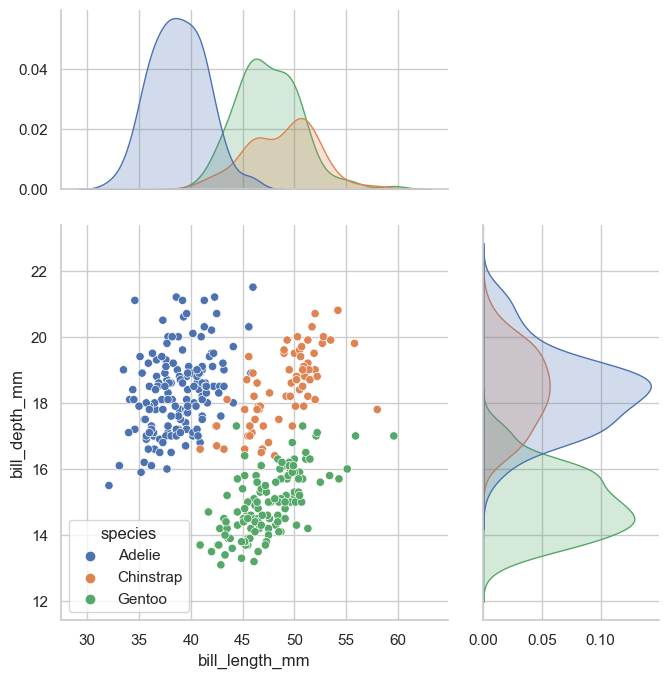

In [90]:
# height, ratio, marginal_ticks 키워드 인수를 추가 
# 이 인수를 활용하여 전체 그래프의 크기(height), main과 marginal
# 그래프 간의 비율(ratio), marginal histogram에 ticks을 표현할지
# 조절할 수 있다.

# Use JointGrid parameters to control the size and layout of the figure
sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species',
              height = 7, ratio = 2, marginal_ticks = True)

# pairplot()

In [91]:
# 데이터셋 내의 각 column마다 경우에 수에 따라 pair로 묶고, 각각의 column 쌍에 대한
# 분석 결과를 일목요연하게 한번에 확인할 수 있는 플롯이다.

# seaborn.pairplot(data, *, hue = None, hue_order = None, palette = None, vars = None,
#                  x_vars = None, y_vars = None, kind = 'scatter', diag_king = 'auto',
#                  markers = None, height = 2.5, aspect = 1, corner = False, dropna = False,
#                  plot_kws = None, diag_kws = None, grid_kws = None, size = None)

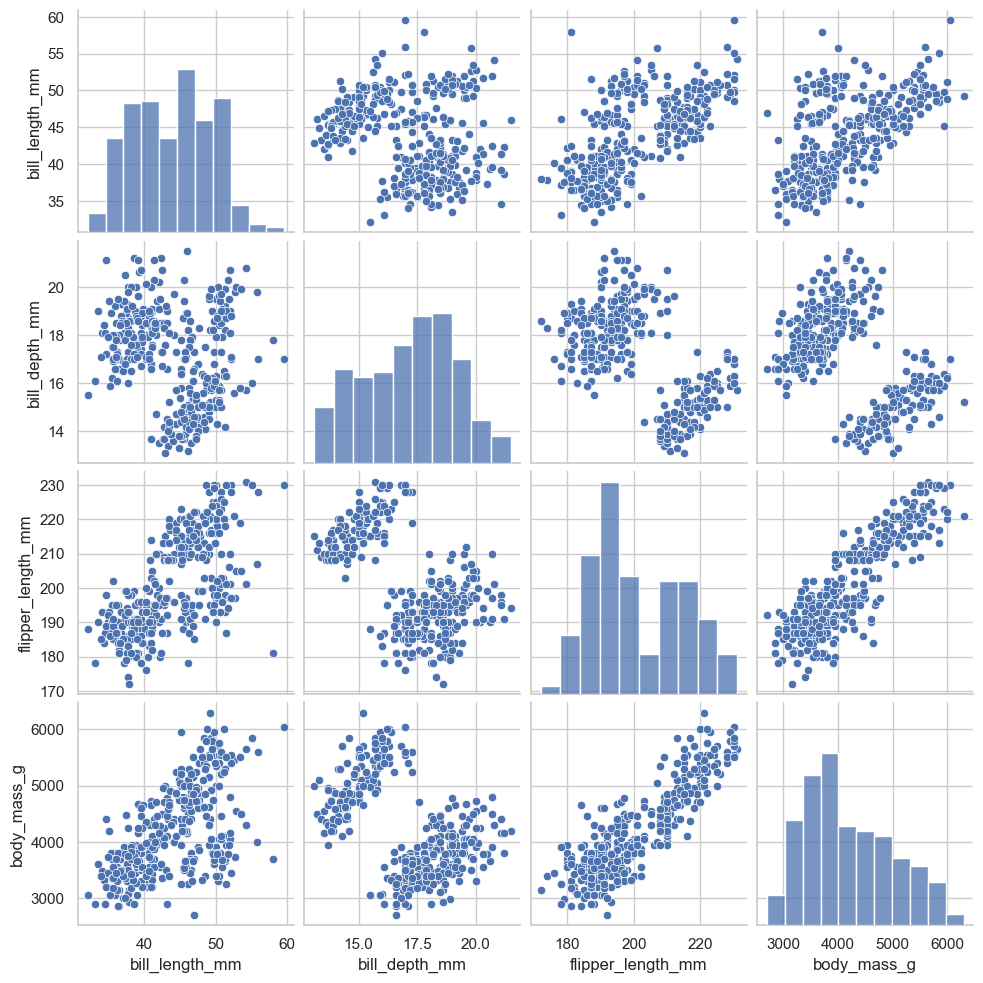

In [92]:
# pairplot()으로 서로 다른 column 간에 비교할 때 가장 단순하게 적용하기 좋은
# 것이 scatterplot()이다.

# 같은 column이 겹치는 위치에는 histplot()의 결과를 보여줘서 값의 밀도가 어떻게
# 되는 지 보여준다.

# The simplest invocation uses scatterplot()
# for each pairing of the variables and histplot()
# for the marginal plots along the diagnal
penguins = sns.load_dataset('penguins')
sns.pairplot(penguins)

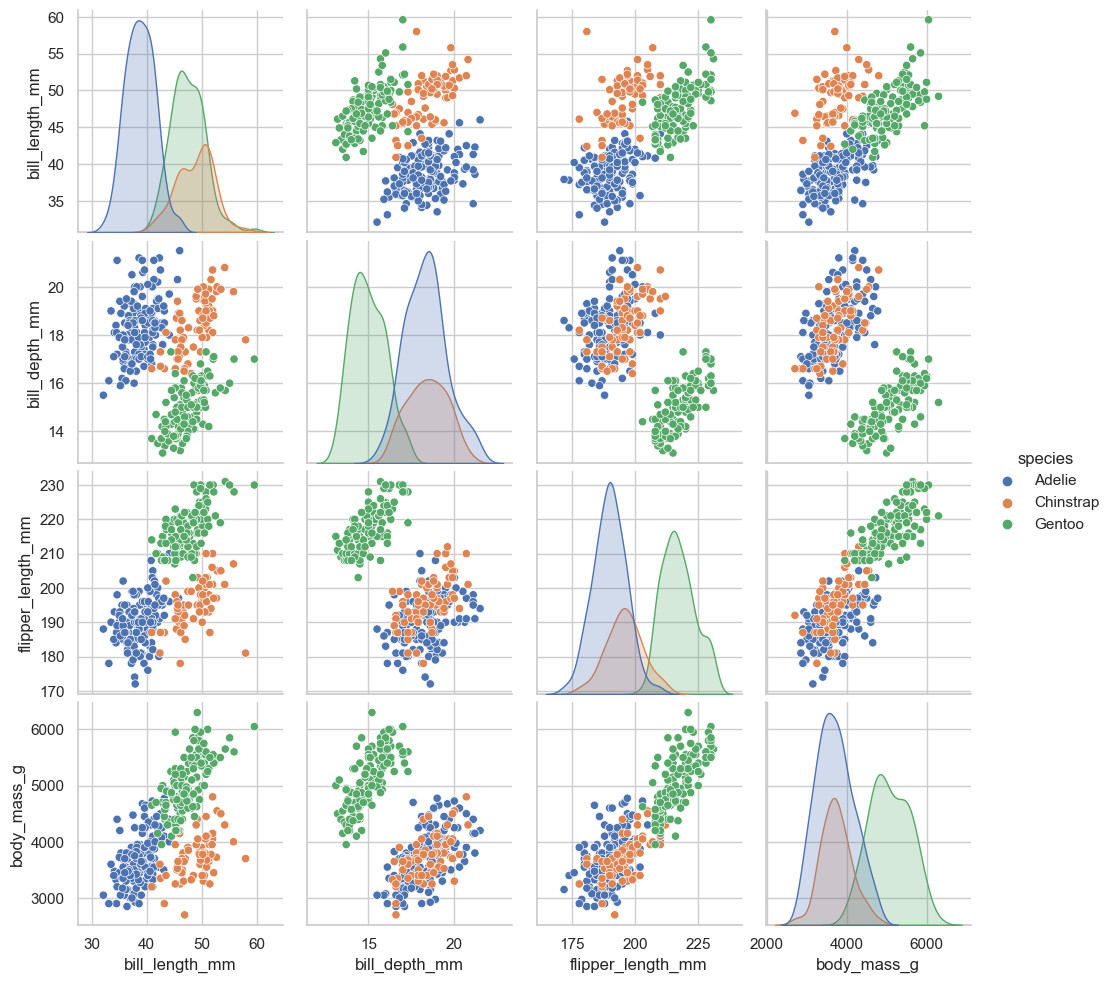

In [93]:
# 의미 있는 관계로 엮기 위해서 hue 키워드 인수에 species를 전달하여 펭귄의 종마다
# 어떤 분포를 갖는지 분류를 하였다.

# joint plot 때와 같게도 자동적으로 marginal plot의 형태가 kde로 변경된 것을 확인할 수 있다.

# Assigning a hue variable adds a semantic mapping
# and changes the default marginal plot
# to a layered kernel density estimate (KDE)

sns.pairplot(penguins, hue = 'species')

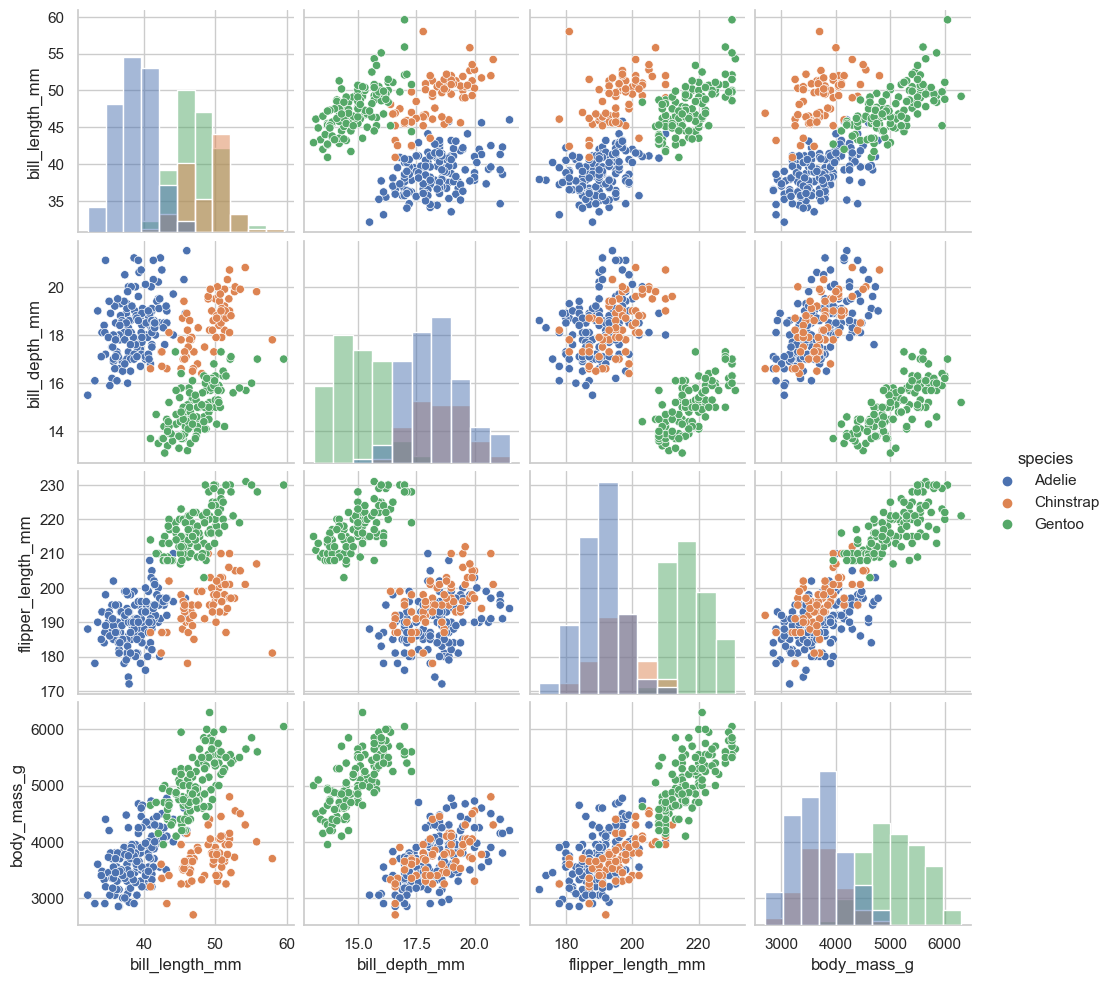

In [94]:
# marginal plot이 kde가 아닌 histogram으로 표현할 수도 있다.
# diag_kind 키워드 인수를 사용하면 된다.

# histogram을 의미하는 hist 문자열을 값으로 전달하면 된다.

# It's possible to force nmarginal histograms
sns.pairplot(penguins, hue = 'species', diag_kind = 'hist')

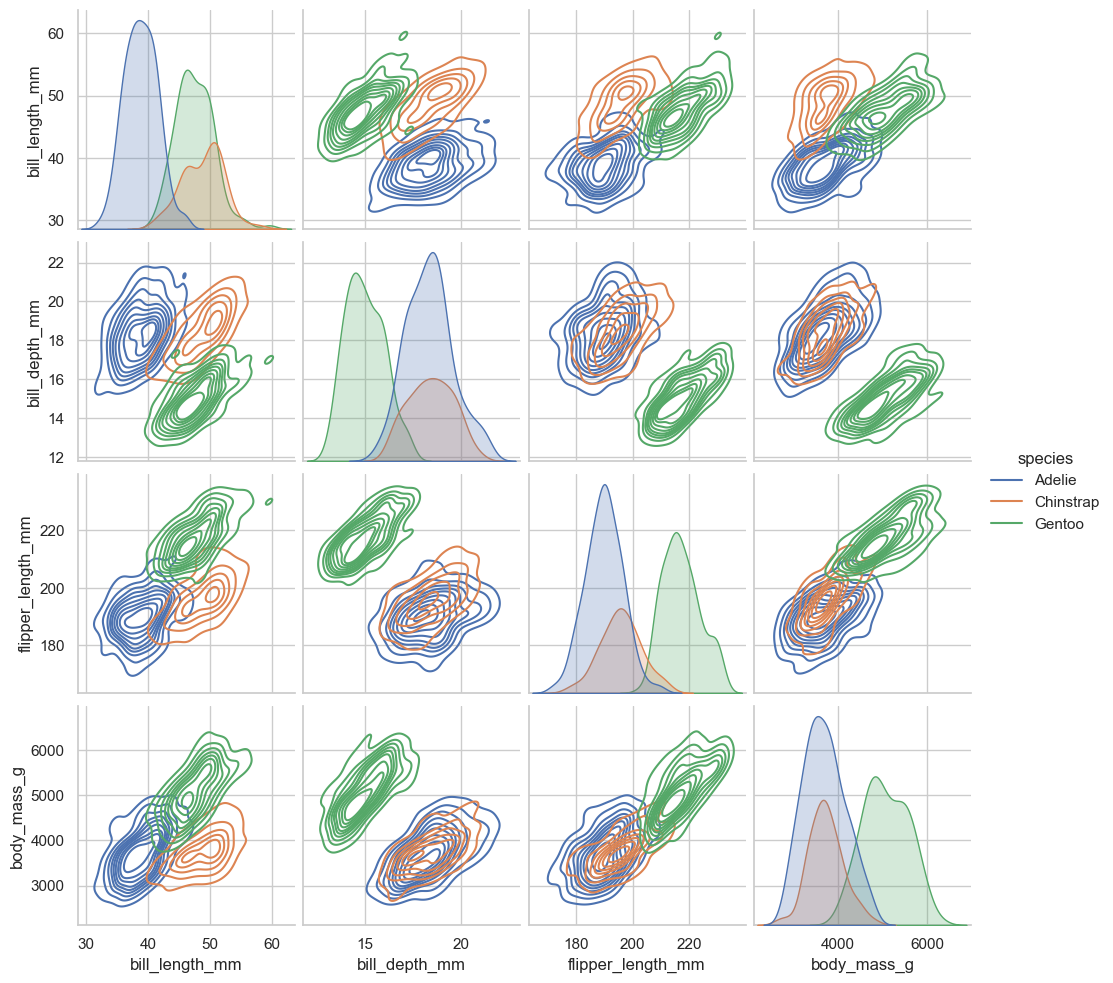

In [95]:
# 다른 column과의 비교하는 영역의 플롯의 종류도 변경할 수 있다.

# 여기서는 kind라는 키워드 인수에 kde를 전달하여 서로 다른 column 간에 결과를
# 더 보기좋게 비교할 수 있게 해준다.

# The kind parameter determines both the diagnol
# and off-diagnal plotting style.
# Several options are available, including using kdeplot() to draw KDEs
sns.pairplot(penguins, hue = 'species', kind = 'kde')

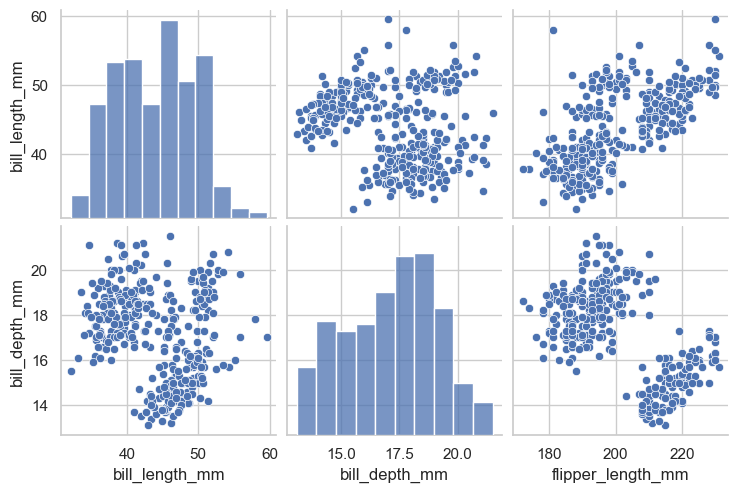

In [96]:
# x_vars, y_vars 키워드 인수를 활용하여 원하는 column만 추려서 비교를 할 수도 있다.

# 꼭 정방형의 모양이 아니더라도 괜찮다.

# Use vars or x_vars and y_vars to select the variables to plot
sns.pairplot(
    penguins,
    x_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
    y_vars = ['bill_length_mm', 'bill_depth_mm']
)

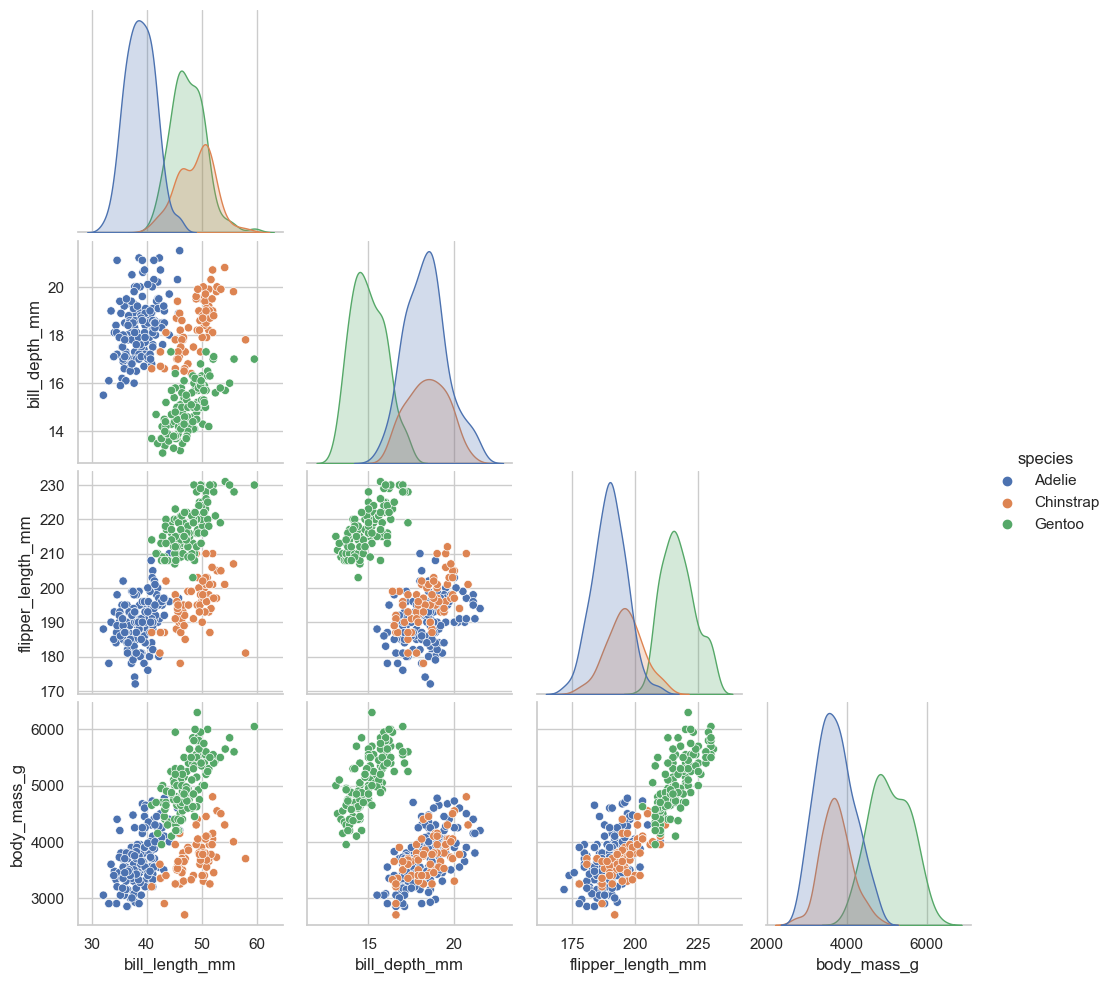

In [97]:
# 중복되는 부분이 있다고 여기는 사람도 분명 존재할 것이다. 
# 한 방향으로만 그 분포를 얻으면 된다 싶으면 corner라는
# 키워드 인수를 True로 설정하면 된다.

# 그럼 삼각형 모양의 (축의 방향을 고려 않았을 때)중복 없는 결과를 얻을 수 있다.

# Set corner = True to plot only the lower triangle
sns.pairplot(penguins, hue = 'species', corner = True)

# pandas pivot table

In [98]:
# pivot table이란 데이터 column 중에서 두 개의 column을 각각 row 인덱스, column
# 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것을 말한다.

# pandas는 지정된 두 column을 각각 row 인덱스와 column 인덱스로 바꾼 후 row
# 인덱스의 label 값이 첫번째 키의 값과 같고 column 인덱스의 label 값이 두번째 키의 값과
# 같은 데이터를 찾아서 해당 칸에 넣는다. 
# 만약 주어진 데이터가 존재하지 않으면 해당 칸에 NaN 값을 넣는다.

In [99]:
# pandas는 pivot table을 만들기 위한 pivot_table() 메서드를 제공한다. 
# 첫번째 인수로는 DataFrame을, 두번째 인수로는 데이터로 사용할 column 이름을, 
# 세번째 인수로는 row 인덱스로 사용할 column name, 네번째 인수로는 column 인덱스로 사용할
# column name을 넣는다. 
# 그 다음은 aggfunc 키워드 인자가 나오는데 기본적으로 평균 값을 구하도록 default 값이 설정되어 있다.

# pandas.pivot_table(data, values = None, index = None, columns = None, aggfunc = 'mean',
#                    fill_value = None, margins = False, dropna = True, margin_name = 'All',
#                    observed = False, sort = True)

In [100]:
# DataFrame에서도 pivot table을 만들기 위한 pivot_table() 메서드를 제공한다. 
# 첫번째 인수로는 데이터로 사용할 column 이름을, 
# 두번째 인수로는 row 인덱스로 사용할 column name, 
# 세번째 인수로는 column 인덱스로 사용할 column name을 넣는다. 
# 그 다음은 aggfunc 키워드 인자가 나오는데 기본적으로 평균 값을 구하도록 default 값이 설정되어 있다.

# DataFrame.pivot_table(values = None, index = None, columns = None, aggfinc = 'mean',
#                       fil_value = None, margins = Fasle, dropna = True,
#                       margins_name = 'All', observed = False, sort = True)

In [101]:
# row index로 선실 등급을 나타내는 class column을 column index로 child, man,
# woman의 분류를 나누는 카테고리 값인 who를 지정했다. 
# 그리고 이때의 값은 생존 여부를 나타내는 survived column을 사용했다. 
# aggfunc 키워드 인수를 따로 지정하지 않아서 여기서는 값의 평균을 구하고 있다.

titanic = sns.load_dataset('titanic')
pd.pivot_table(titanic, 'survived', index = 'class', columns = 'who')

who        child       man     woman
class                               
First   0.833333  0.352941  0.978022
Second  1.000000  0.080808  0.909091
Third   0.431034  0.119122  0.491228

In [102]:
# aggfunc 키워드 인수를 여기선 np.sum으로 전달하고 있다. 
# 그래서 해당하는 칸에 값이 여럿이 올 때 그 값들을 다 더하고 있다. 
# 아래 예제에서는 class와 who에 따른 생존자 숫자가 된다.

pd.pivot_table(titanic, values = 'survived', index = 'class',
               columns = 'who', aggfunc = np.sum)

who     child  man  woman
class                    
First       5   42     89
Second     19    8     60
Third      25   38     56

In [103]:
# 해당하는 값이 없다면 이는 NaN으로 표현된다. 
# 이 값은 pivot_table() 메서드 인자 중 fill_value에 값을 전달하면 
# 해당 값으로 NaN이 처리되게 된다.

pd.pivot_table(titanic, values = 'survived', index = 'class',
               columns = 'deck', aggfunc = np.mean)

deck           A         B        C         D     E      F    G
class                                                          
First   0.466667  0.744681  0.59322  0.758621  0.72    NaN  NaN
Second       NaN       NaN      NaN  0.750000  0.75  0.875  NaN
Third        NaN       NaN      NaN       NaN  1.00  0.200  0.5

In [104]:
pd.pivot_table(titanic, values = 'survived', index = 'class',
               columns = 'deck', aggfunc = np.mean, fill_value = 0)
# fill_value에 0을 전달함

deck           A         B        C         D     E      F    G
class                                                          
First   0.466667  0.744681  0.59322  0.758621  0.72  0.000  0.0
Second  0.000000  0.000000  0.00000  0.750000  0.75  0.875  0.0
Third   0.000000  0.000000  0.00000  0.000000  1.00  0.200  0.5

# heatmap()

In [105]:
# 데이터셋 중 비교하고자 하는 column의 pair가 모두 카테고리 값이거나, 피봇테이블의
# 결과를 가지고 heatmap()으로 표현하면 각 column 간의 상관 관계를 색상의 짙고
# 옅음으로 표현할 수 있다.

# seaborn.heatmap(data, *, vmin = None, vmax = None, cmap = None, center = None,
#                 robust = False, annot = None, fmt = '.2g', annot_kws = None,
#                 linewidth = 0, linecolor = 'white', cbar = True, char_kws = None,
#                 cbar_ax = None, square = False, xticklabels = 'auto',
#                 yticklabels = 'auto', mask = None, ax = None, **kwargs)

<AxesSubplot:xlabel='who', ylabel='class'>

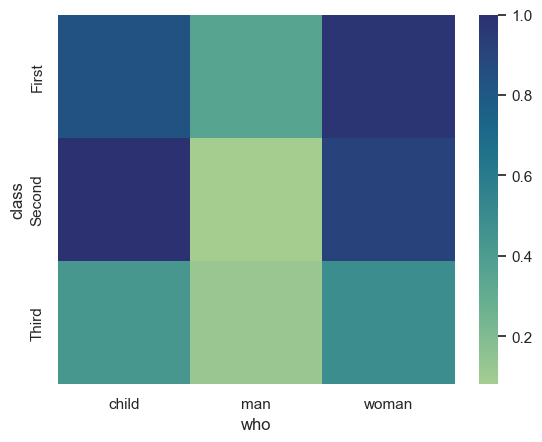

In [106]:
# 타이타닉호 데이터셋 중 선실 등급과 사람의 분류에 따라 생존률을 피봇테이블의 결과로 만들었다.
# 그리고 이 피봇테이블을 heatmap()의 인수로 전달했다. 
# 또 cmap을 활용하여 “crest” 테마를 적용했다. 

# 짙은 푸른 빛을 띌수록 생존율이 높고 노란 빛에 가까울수록 생존율이 낮습니다.

# Pass a DataFrame to plot with indices as row/column labels
ttn_cls_who = pd.pivot_table(titanic, 'survived', index = 'class', columns = 'who')
sns.heatmap(ttn_cls_who, cmap = 'crest')

<AxesSubplot:xlabel='who', ylabel='class'>

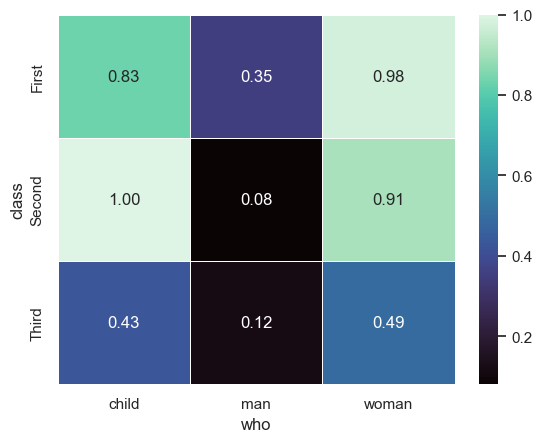

In [107]:
# 같은 데이터에 이번에는 다른 키워드 인수들을 추가하여 옵션을 달리해봤다. 
# annot 키워드 인수에 True 값을 줘서 각 cell마다 value를 표기했고, 
# 동시에 fmt 키워드 인수를 사용해서 cell마다 표기한 value의 포맷을 지정 

# 뿐만 아니라 linewidth를 명시하여 cell 간의 구분을 더 명확하게 지정

# Use annot to represent the cell values with text
# Control the annotations with a formatting string
# Add lines between cells 
sns.heatmap(ttn_cls_who, cmap = 'mako', annot = True, fmt = '.2f', linewidth = .5)